<img src="../.images/logosnb.png" alt="Banner" style="width: 800px;"/>

# Iris dataset

Bron: Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

De Iris dataset werd in 1936 door de Brit Ronald Fischer gepubliceerd in 'The use of multiple measurements in taxonomic problems'. [1][2]<br> 
De dataset beteft drie soorten irissen (*Iris setosa*, *Iris virginica* en *Iris versicolor*).
Fischer kon de soorten van elkaar onderscheiden afgaande op vier kenmerken: de lengte en breedte van de kelkbladen en bloembladen.

<table><tr>
<td><img src="../.images/IntroductieMachineLearning/Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="Drawing" style="width: 200px;"/></td>
<td><img src="../.images/IntroductieMachineLearning/Iris_versicolor_3.jpg" alt="Drawing" style="width: 220px;"/></td>
<td><img src="../.images/IntroductieMachineLearning/Iris_virginica.jpg" alt="Drawing" style="width: 203px;"/></td>
</tr></table>

<table><tr>
    <td><em>Iris setosa</em> [3]</td>
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td><em>Iris versicolor</em> [4]</td>
<td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td><em>Iris virginica</em> [5]</td>
</tr></table>
<br>
<center>Figuur 1: <em>Iris setosa</em> door Kosaciec Szczecinkowaty [CC BY-SA 3.0 (https://creativecommons.org/licenses/by-sa/3.0)], via Wikimedia Commons;<br> <em>Iris versicolor</em> door Frank Mayfield [CC BY-SA 2.0 (https://creativecommons.org/licenses/by-sa/2.0)], via Wikimedia Commons;<br> <em>Iris virginica</em>. No machine-readable author provided. Dlanglois assumed (based on copyright claims). CC BY-SA 3.0, via Wikimedia Commons. </center>

Het is een *multivariate dataset* (een dataset met meerdere variabelen) die van elke soort 50 monsters bevat. Van elk monster werden de lengte en de breedte van de een bloemblad en een kelkblad opgemeten in centimeter. 

R. A. Fisher (1936), "The use of multiple measurements in taxonomic problems", Annals of Eugenics, 7 (2): 179–188, doi:10.1111/j.1469-1809.1936.tb02137.x

<img src="../.images/IntroductieMachineLearning/bloemblad-kelkblad.jpg" alt="Drawing" style="width: 200px;"/> 

## De nodige modules importeren

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Inlezen van de data

Lees met de module `pandas` de Iris dataset in.

In [2]:
iris = pd.read_csv("../.data/IntroductieMachineLearning/irisHoofding.dat", header="infer")  # in te lezen tabel heeft een hoofding

## 2. Tonen van de ingelezen data

Kijk de gegevens is. Zowel de vier kenmerken, als de naam van de soort worden weergegeven. Het aantal monsters is gemakkelijk af te lezen.

Hoeveel variabelen heeft deze *multivariate dataset*?

In [3]:
iris

,lengte kelkblad,breedte kelkblad,lengte bloemblad,breedte bloemblad,soort Iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Deze tabel komt overeen met een matrix met 150 rijen en 5 kolommen: <br>
150 monsters, 4 kenmerken (x1, x2, x3, x4) en 1 label (y) <br><br>
De kenmerken:<br>
- eerste kolom: lengte kelkblad 
- tweede kolom: breedte kelkblad
- derde kolom: lengte bloemblad 
- vierde kolom: breedte bloemblad<br><br>

Het label:<br>
- laatste kolom: de naam van de soort 

Het is mogelijk enkel het begin of enkel het laatste deel van de tabel te tonen.

In [4]:
iris.head()

,lengte kelkblad,breedte kelkblad,lengte bloemblad,breedte bloemblad,soort Iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.tail()

,lengte kelkblad,breedte kelkblad,lengte bloemblad,breedte bloemblad,soort Iris
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Het is ook mogelijk om een bepaald deel van de tabel te tonen.

In [6]:
iris[46:54]

,lengte kelkblad,breedte kelkblad,lengte bloemblad,breedte bloemblad,soort Iris
46,5.1,3.8,1.6,0.2,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
48,5.3,3.7,1.5,0.2,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor


Met deze laatste deeltabel ga je aan de slag.

## 3. Onderzoek: kunnen beide soorten irissen onderscheiden worden gebaseerd op twee kenmerken

## 3.1 Bekijk monsters van twee soorten irissen, *Iris setosa*  en *Iris versicolor*, vier van elk

<table><tr>
<td><img src="../.images/IntroductieMachineLearning/Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="Drawing" style="width: 200px;"/></td>
<td><img src="../.images/IntroductieMachineLearning/Iris_versicolor_3.jpg" alt="Drawing" style="width: 300px;"/></td>
</tr></table>

<table><tr>
<td> *Iris setosa*</td>
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
<td> *Iris versicolor* </td>
</tr></table>
<br>
Bron: Kosaciec Szczecinkowaty [CC BY-SA 3.0 (https://creativecommons.org/licenses/by-sa/3.0)], via Wikimedia Commons
<br>
Bron: Frank Mayfield [CC BY-SA 2.0 (https://creativecommons.org/licenses/by-sa/2.0)], via Wikimedia Commons

In [7]:
# vier monsters van setosa en versicolor selecteren, dus acht van de eerste honderd monsters 
# lengte kelkblad en lengte bloemblad selecteren, deze staan in eerste en derde kolom
X = iris.iloc[46:54, [0, 2]].values            # X wordt opgebouwd met eerste en derde kolom
# X is een matrix met 8 rijen en 2 kolommen
X.shape        

(8, 2)

In [8]:
print(X[:, 0])    # eerste kolom van X: lengte kelkblad
print(X[:, 1])    # tweede kolom van X: lengte bloemblad

[5.1 4.6 5.3 5.  7.  6.4 6.9 5.5]
[1.6 1.4 1.5 1.4 4.7 4.5 4.9 4. ]


## 3.2 De data weergeven in puntenwolk

In [9]:
x1 = X[:, 0]  # kenmerk: lengte kelkblad komt op x-as
x2 = X[:, 1]  # kenmerk: lengte bloemblad komt op y-as

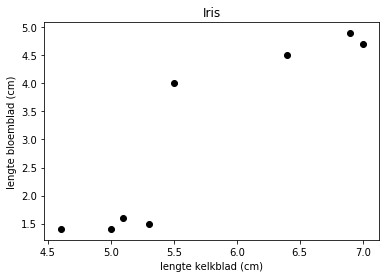

In [10]:
# breedte bloemblad t.o.v. lengte kelkblad
plt.scatter(x1, x2, color="black", marker="o")
plt.title("Iris")
plt.xlabel("lengte kelkblad (cm)")
plt.ylabel("lengte bloemblad (cm)")
plt.show()

Er zijn twee groepen te onderscheiden. Op de grafiek is niet duidelijk welk datapunt bij welke soort iris hoort. 

## 3.3 Data weergeven als twee klassen

Puntenwolk aanpassen zodat de twee irissoorten elk door een ander symbool worden weergegeven. 

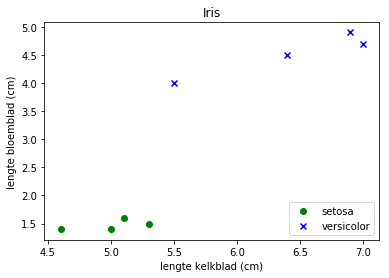

In [11]:
# lengte bloemblad t.o.v. lengte kelkblad
plt.scatter(x1[:4], x2[:4], color="green", marker="o", label="setosa")      # setosa zijn eerste 50
plt.scatter(x1[4:], x2[4:], color="blue", marker="x", label="versicolor")   # versicolor zijn volgende 50
           
plt.title("Iris")
plt.xlabel("lengte kelkblad (cm)")
plt.ylabel("lengte bloemblad (cm)")
plt.legend(loc="lower right")
plt.show()

STANDAARDISEREN!!!!

## 4. Classificatie

## 4.1 Geannoteerde data

Het AI-systeem zal machinaal leren uit de 8 gelabelde voorbeelden.<br> 
Lees de labels in.

In [12]:
y = iris.iloc[46:54, 4].values             # labels: laatste kolom van de oorspronkelijke tabel
y = np.where(y == "Iris-setosa", 1, 0)     # labels numeriek maken, setosa:1, versicolor:0

## 4.2 Met 1 neuron (perceptron)

Er wordt een willekeurige rechte gekozen die de twee soorten irissen zou moeten scheiden. Beide kanten van deze *scheidingslijn* bepalen een andere *klasse*. <br>Dit gebeurt door eerst de coëfficiënten in de vergelijking van de rechte willekeurig te kiezen.<br>Het systeem wordt *getraind* met de trainingset en de gegeven labels: Voor elk punt van de trainingset wordt nagegaan of het punt aan de juiste kant van de scheidingslijn ligt. Bij een punt dat niet aan de juiste kant van de scheidingslijn ligt, worden de coëfficiënten in de vergelijking van de rechte aangepast. <br>
De volledige trainingset wordt een aantal keer doorlopen. Het systeem *leert* gedurende deze *pogingen ('epochs')*.

In [17]:
def grafiek(cte, coeff_x1, coeff_x2):
        """Plot scheidingsrechte ('decision boundary') en geeft vergelijking ervan."""
        # lengte bloemblad t.o.v. lengte kelkblad
        plt.scatter(x1[:4], x2[:4], color="green", marker="o", label="setosa")      # setosa zijn eerste 50
        plt.scatter(x1[4:], x2[4:], color="blue", marker="x", label="versicolor")   # versicolor zijn de volgende 50
        x = np.linspace(4, 7.5, 10)
        y_r = -coeff_x1/coeff_x2 * x - cte/coeff_x2
        print("De grens is een rechte met vgl.", coeff_x1, "* x1 +", coeff_x2, "* x2 +", cte, "= 0")
        plt.plot(x, y_r, color="black")
        plt.title("Classificatie iris")
        plt.xlabel("lengte kelkblad (cm)")
        plt.ylabel("lengte bloemblad (cm)")
        plt.legend(loc="lower right")
        plt.show()


class Perceptron(object):
    """Perceptron classifier.""" 
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        """self heeft drie parameters: leersnelheid, aantal pogingen, willekeurigheid."""
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        # kolommatrix van de gewichten ('weights')
        # willekeurig gegenereerd uit normale verdeling met gemiddelde 0 en standaardafwijking 0.01
        # aantal gewichten is aantal kenmerken in X plus 1 (+1 voor de bias)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]+1)     # gewichtenmatrix
        print("Initiële willekeurige gewichten:", self.w_)
        self.errors_ = []    # foutenlijst
        
        cte, coeff_x1, coeff_x2 = self.w_[0], self.w_[1], self.w_[2]
        # plot grafiek met scheidingsrechte
        grafiek(cte, coeff_x1, coeff_x2)
        
        # gewichten punt per punt aanpassen, gebaseerd op feedback van de verschillende pogingen        
        for _ in range(self.n_iter):
            print("epoch =", _)
            errors = 0
            teller = 0
            for x, label in zip(X, y):            # x is datapunt, y overeenkomstig label
                print("teller =", teller)         # tel punten, het zijn er acht
                print("punt:", x, "\tlabel:", label)
                gegiste_klasse = self.predict(x)
                print("gegiste klasse =", gegiste_klasse)
                # aanpassing nagaan voor dit punt
                update = self.eta * (label - gegiste_klasse)     # als update = 0, juiste klasse, geen aanpassing nodig
                print("update=", update)
                # grafiek en gewichten eventueel aanpassen na dit punt
                if update !=0:
                    self.w_[1:] += update *x
                    self.w_[0] += update
                    errors += update
                    print("gewichten =", self.w_)
                    cte, coeff_x1, coeff_x2 = self.w_[0], self.w_[1], self.w_[2]
                    grafiek(cte, coeff_x1, coeff_x2)
                teller += 1
            self.errors_.append(errors)           # na alle punten, totale fout toevoegen aan foutenlijst
            print("foutenlijst =", self.errors_)
            # voorlopige 'decision boundary'
            # cte, coeff_x1, coeff_x2 = self.w_[0], self.w_[1], self.w_[2]
            # grafiek(X, cte, coeff_x1, coeff_x2)
        return self        # geeft gewichtenmatrix en errorlijst terug
    
    def net_input(self, X):      # punt invullen in de voorlopige scheidingsrechte
        """Berekenen van z = lineaire combinatie van de xi - bias voor elke gegeven punt."""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Gist klasse."""
        print("ingevuld in rechte:", self.net_input(X))
        klasse = np.where(self.net_input(X) >=0, 1, 0)
        print("Klasse=", klasse)
        print(self.w_[2])
        if self.w_[2] >= 0:
            if klasse == 1:
                klasse = 0
            else:
                klasse = 1  
        print(klasse)
        return klasse
    

Initiële willekeurige gewichten: [ 0.01624345 -0.00611756 -0.00528172]
De grens is een rechte met vgl. -0.006117564136500754 * x1 + -0.005281717522634557 * x2 + 0.01624345363663242 = 0


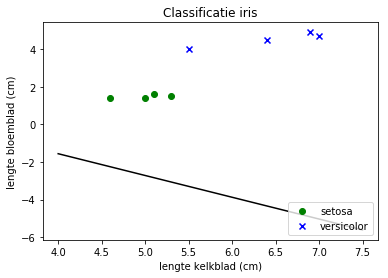

epoch = 0
teller = 0
punt: [5.1 1.6] 	label: 1
ingevuld in rechte: -0.02340687149573672
0
-0.005281717522634557
0
gegiste klasse = 0
update= 0.1
gewichten = [0.11624345 0.50388244 0.15471828]
De grens is een rechte met vgl. 0.5038824358634992 * x1 + 0.15471828247736547 * x2 + 0.11624345363663242 = 0


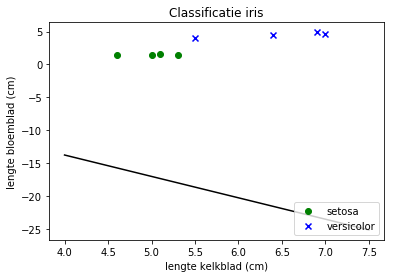

teller = 1
punt: [4.6 1.4] 	label: 1
ingevuld in rechte: 2.65070825407704
1
0.15471828247736547
0
gegiste klasse = 0
update= 0.1
gewichten = [0.21624345 0.96388244 0.29471828]
De grens is een rechte met vgl. 0.9638824358634992 * x1 + 0.2947182824773654 * x2 + 0.21624345363663244 = 0


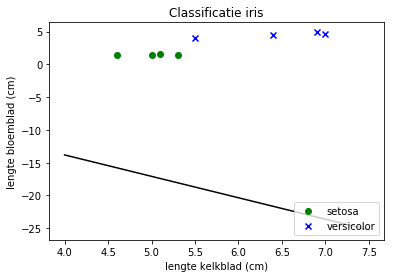

teller = 2
punt: [5.3 1.5] 	label: 1
ingevuld in rechte: 5.766897787429227
1
0.2947182824773654
0
gegiste klasse = 0
update= 0.1
gewichten = [0.31624345 1.49388244 0.44471828]
De grens is een rechte met vgl. 1.4938824358634992 * x1 + 0.44471828247736545 * x2 + 0.3162434536366324 = 0


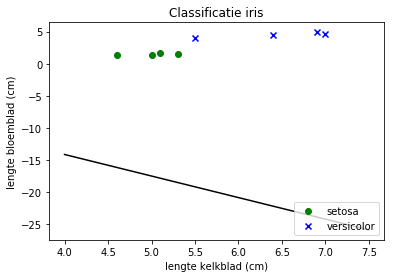

teller = 3
punt: [5.  1.4] 	label: 1
ingevuld in rechte: 8.40826122842244
1
0.44471828247736545
0
gegiste klasse = 0
update= 0.1
gewichten = [0.41624345 1.99388244 0.58471828]
De grens is een rechte met vgl. 1.9938824358634992 * x1 + 0.5847182824773655 * x2 + 0.4162434536366324 = 0


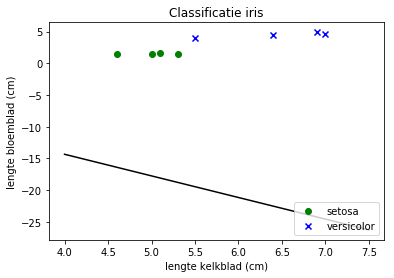

teller = 4
punt: [7.  4.7] 	label: 0
ingevuld in rechte: 17.121596432324743
1
0.5847182824773655
0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
ingevuld in rechte: 15.808323314311172
1
0.5847182824773655
0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
ingevuld in rechte: 17.039151845233867
1
0.5847182824773655
0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
ingevuld in rechte: 13.72146998079534
1
0.5847182824773655
0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.4]
epoch = 1
teller = 0
punt: [5.1 1.6] 	label: 1
ingevuld in rechte: 11.520593128504263
1
0.5847182824773655
0
gegiste klasse = 0
update= 0.1
gewichten = [0.51624345 2.50388244 0.74471828]
De grens is een rechte met vgl. 2.503882435863499 * x1 + 0.7447182824773655 * x2 + 0.5162434536366324 = 0


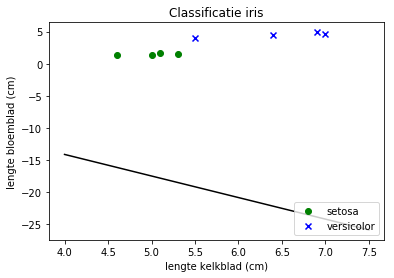

teller = 1
punt: [4.6 1.4] 	label: 1
ingevuld in rechte: 13.076708254077037
1
0.7447182824773655
0
gegiste klasse = 0
update= 0.1
gewichten = [0.61624345 2.96388244 0.88471828]
De grens is een rechte met vgl. 2.963882435863499 * x1 + 0.8847182824773655 * x2 + 0.6162434536366324 = 0


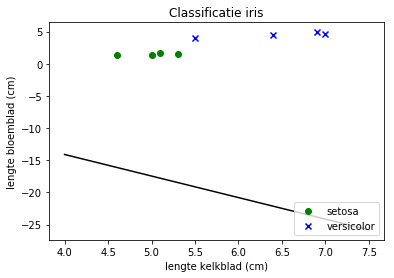

teller = 2
punt: [5.3 1.5] 	label: 1
ingevuld in rechte: 17.651897787429224
1
0.8847182824773655
0
gegiste klasse = 0
update= 0.1
gewichten = [0.71624345 3.49388244 1.03471828]
De grens is een rechte met vgl. 3.4938824358634992 * x1 + 1.0347182824773655 * x2 + 0.7162434536366323 = 0


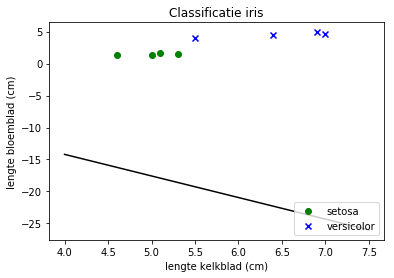

teller = 3
punt: [5.  1.4] 	label: 1
ingevuld in rechte: 19.63426122842244
1
1.0347182824773655
0
gegiste klasse = 0
update= 0.1
gewichten = [0.81624345 3.99388244 1.17471828]
De grens is een rechte met vgl. 3.9938824358634992 * x1 + 1.1747182824773654 * x2 + 0.8162434536366323 = 0


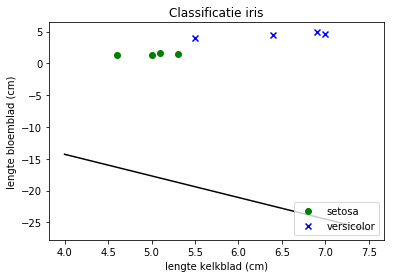

teller = 4
punt: [7.  4.7] 	label: 0
ingevuld in rechte: 34.294596432324745
1
1.1747182824773654
0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
ingevuld in rechte: 31.66332331431117
1
1.1747182824773654
0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
ingevuld in rechte: 34.13015184523387
1
1.1747182824773654
0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
ingevuld in rechte: 27.48146998079534
1
1.1747182824773654
0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.4, 0.4]
epoch = 2
teller = 0
punt: [5.1 1.6] 	label: 1
ingevuld in rechte: 23.064593128504264
1
1.1747182824773654
0
gegiste klasse = 0
update= 0.1
gewichten = [0.91624345 4.50388244 1.33471828]
De grens is een rechte met vgl. 4.503882435863499 * x1 + 1.3347182824773656 * x2 + 0.9162434536366323 = 0


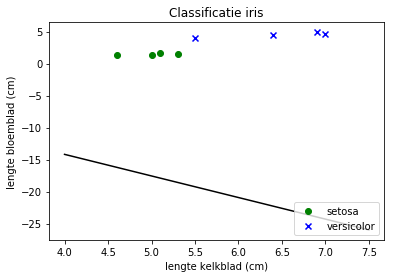

teller = 1
punt: [4.6 1.4] 	label: 1
ingevuld in rechte: 23.502708254077035
1
1.3347182824773656
0
gegiste klasse = 0
update= 0.1
gewichten = [1.01624345 4.96388244 1.47471828]
De grens is een rechte met vgl. 4.963882435863499 * x1 + 1.4747182824773655 * x2 + 1.0162434536366323 = 0


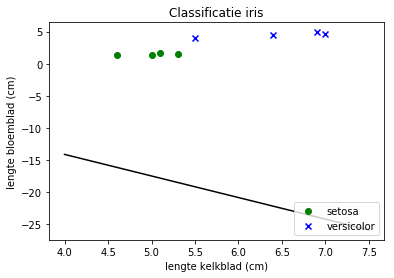

teller = 2
punt: [5.3 1.5] 	label: 1
ingevuld in rechte: 29.536897787429226
1
1.4747182824773655
0
gegiste klasse = 0
update= 0.1
gewichten = [1.11624345 5.49388244 1.62471828]
De grens is een rechte met vgl. 5.493882435863499 * x1 + 1.6247182824773656 * x2 + 1.1162434536366324 = 0


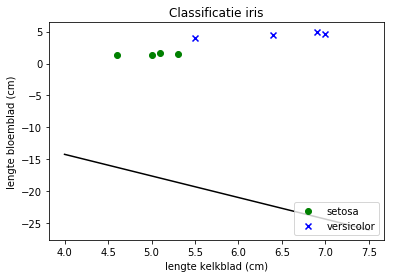

teller = 3
punt: [5.  1.4] 	label: 1
ingevuld in rechte: 30.860261228422438
1
1.6247182824773656
0
gegiste klasse = 0
update= 0.1
gewichten = [1.21624345 5.99388244 1.76471828]
De grens is een rechte met vgl. 5.993882435863499 * x1 + 1.7647182824773655 * x2 + 1.2162434536366324 = 0


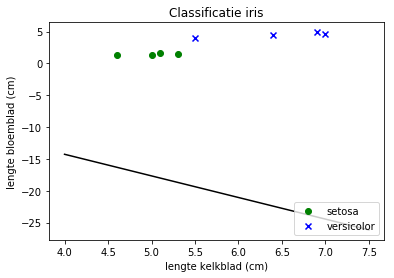

teller = 4
punt: [7.  4.7] 	label: 0
ingevuld in rechte: 51.46759643232475
1
1.7647182824773655
0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
ingevuld in rechte: 47.51832331431117
1
1.7647182824773655
0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
ingevuld in rechte: 51.22115184523387
1
1.7647182824773655
0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
ingevuld in rechte: 41.24146998079534
1
1.7647182824773655
0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.4, 0.4, 0.4]
epoch = 3
teller = 0
punt: [5.1 1.6] 	label: 1
ingevuld in rechte: 34.60859312850426
1
1.7647182824773655
0
gegiste klasse = 0
update= 0.1
gewichten = [1.31624345 6.50388244 1.92471828]
De grens is een rechte met vgl. 6.503882435863499 * x1 + 1.9247182824773654 * x2 + 1.3162434536366325 = 0


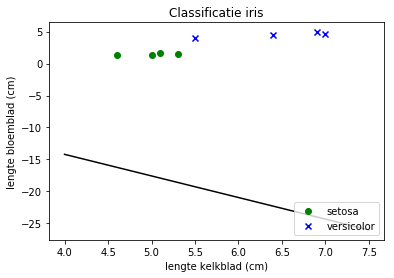

teller = 1
punt: [4.6 1.4] 	label: 1
ingevuld in rechte: 33.92870825407704
1
1.9247182824773654
0
gegiste klasse = 0
update= 0.1
gewichten = [1.41624345 6.96388244 2.06471828]
De grens is een rechte met vgl. 6.963882435863499 * x1 + 2.0647182824773656 * x2 + 1.4162434536366326 = 0


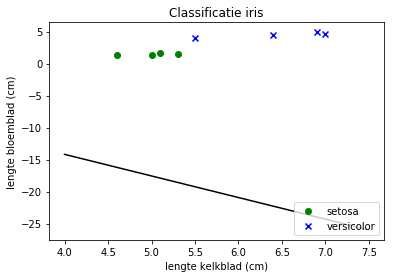

teller = 2
punt: [5.3 1.5] 	label: 1
ingevuld in rechte: 41.421897787429224
1
2.0647182824773656
0
gegiste klasse = 0
update= 0.1
gewichten = [1.51624345 7.49388244 2.21471828]
De grens is een rechte met vgl. 7.493882435863499 * x1 + 2.2147182824773655 * x2 + 1.5162434536366327 = 0


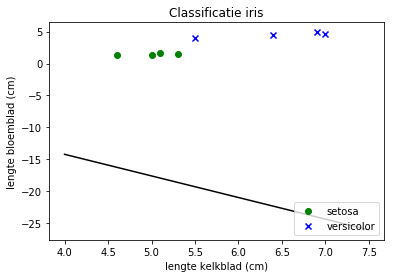

teller = 3
punt: [5.  1.4] 	label: 1
ingevuld in rechte: 42.08626122842244
1
2.2147182824773655
0
gegiste klasse = 0
update= 0.1
gewichten = [1.61624345 7.99388244 2.35471828]
De grens is een rechte met vgl. 7.993882435863499 * x1 + 2.3547182824773656 * x2 + 1.6162434536366328 = 0


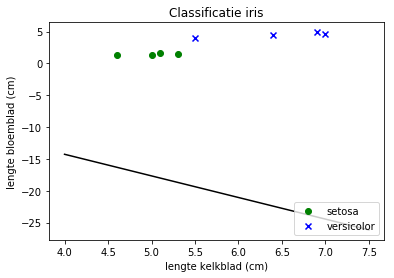

teller = 4
punt: [7.  4.7] 	label: 0
ingevuld in rechte: 68.64059643232474
1
2.3547182824773656
0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
ingevuld in rechte: 63.37332331431118
1
2.3547182824773656
0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
ingevuld in rechte: 68.31215184523387
1
2.3547182824773656
0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
ingevuld in rechte: 55.00146998079534
1
2.3547182824773656
0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.4, 0.4, 0.4, 0.4]
epoch = 4
teller = 0
punt: [5.1 1.6] 	label: 1
ingevuld in rechte: 46.152593128504265
1
2.3547182824773656
0
gegiste klasse = 0
update= 0.1
gewichten = [1.71624345 8.50388244 2.51471828]
De grens is een rechte met vgl. 8.503882435863499 * x1 + 2.5147182824773657 * x2 + 1.7162434536366329 = 0


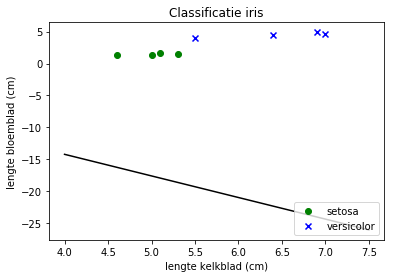

teller = 1
punt: [4.6 1.4] 	label: 1
ingevuld in rechte: 44.35470825407704
1
2.5147182824773657
0
gegiste klasse = 0
update= 0.1
gewichten = [1.81624345 8.96388244 2.65471828]
De grens is een rechte met vgl. 8.9638824358635 * x1 + 2.654718282477366 * x2 + 1.816243453636633 = 0


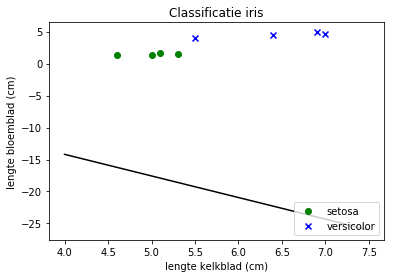

teller = 2
punt: [5.3 1.5] 	label: 1
ingevuld in rechte: 53.30689778742923
1
2.654718282477366
0
gegiste klasse = 0
update= 0.1
gewichten = [1.91624345 9.49388244 2.80471828]
De grens is een rechte met vgl. 9.4938824358635 * x1 + 2.8047182824773658 * x2 + 1.916243453636633 = 0


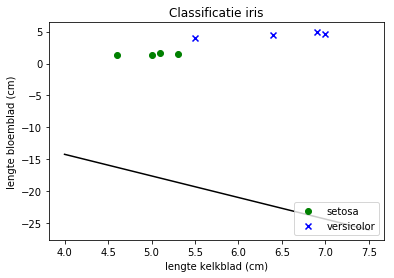

teller = 3
punt: [5.  1.4] 	label: 1
ingevuld in rechte: 53.312261228422436
1
2.8047182824773658
0
gegiste klasse = 0
update= 0.1
gewichten = [2.01624345 9.99388244 2.94471828]
De grens is een rechte met vgl. 9.9938824358635 * x1 + 2.944718282477366 * x2 + 2.016243453636633 = 0


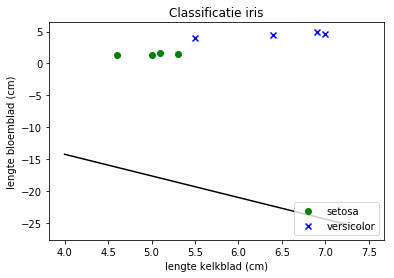

teller = 4
punt: [7.  4.7] 	label: 0
ingevuld in rechte: 85.81359643232474
1
2.944718282477366
0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
ingevuld in rechte: 79.22832331431118
1
2.944718282477366
0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
ingevuld in rechte: 85.40315184523388
1
2.944718282477366
0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
ingevuld in rechte: 68.76146998079534
1
2.944718282477366
0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.4, 0.4, 0.4, 0.4, 0.4]
epoch = 5
teller = 0
punt: [5.1 1.6] 	label: 1
ingevuld in rechte: 57.69659312850426
1
2.944718282477366
0
gegiste klasse = 0
update= 0.1
gewichten = [ 2.11624345 10.50388244  3.10471828]
De grens is een rechte met vgl. 10.503882435863499 * x1 + 3.104718282477366 * x2 + 2.116243453636633 = 0


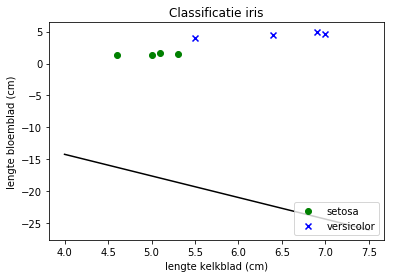

teller = 1
punt: [4.6 1.4] 	label: 1
ingevuld in rechte: 54.78070825407704
1
3.104718282477366
0
gegiste klasse = 0
update= 0.1
gewichten = [ 2.21624345 10.96388244  3.24471828]
De grens is een rechte met vgl. 10.9638824358635 * x1 + 3.244718282477366 * x2 + 2.216243453636633 = 0


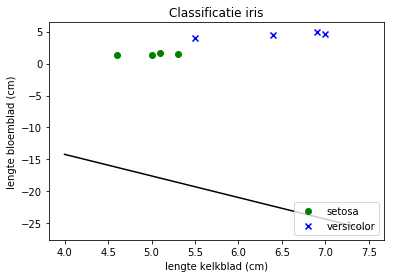

teller = 2
punt: [5.3 1.5] 	label: 1
ingevuld in rechte: 65.19189778742923
1
3.244718282477366
0
gegiste klasse = 0
update= 0.1
gewichten = [ 2.31624345 11.49388244  3.39471828]
De grens is een rechte met vgl. 11.4938824358635 * x1 + 3.394718282477366 * x2 + 2.316243453636633 = 0


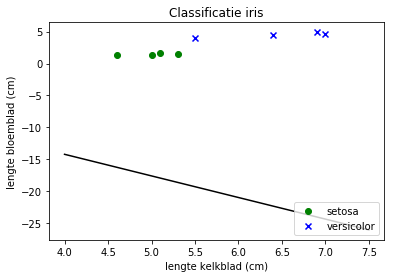

teller = 3
punt: [5.  1.4] 	label: 1
ingevuld in rechte: 64.53826122842244
1
3.394718282477366
0
gegiste klasse = 0
update= 0.1
gewichten = [ 2.41624345 11.99388244  3.53471828]
De grens is een rechte met vgl. 11.9938824358635 * x1 + 3.534718282477366 * x2 + 2.4162434536366333 = 0


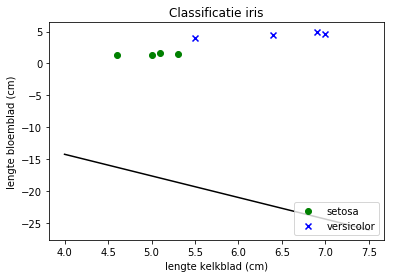

teller = 4
punt: [7.  4.7] 	label: 0
ingevuld in rechte: 102.98659643232476
1
3.534718282477366
0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
ingevuld in rechte: 95.08332331431117
1
3.534718282477366
0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
ingevuld in rechte: 102.49415184523389
1
3.534718282477366
0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
ingevuld in rechte: 82.52146998079536
1
3.534718282477366
0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
epoch = 6
teller = 0
punt: [5.1 1.6] 	label: 1
ingevuld in rechte: 69.24059312850427
1
3.534718282477366
0
gegiste klasse = 0
update= 0.1
gewichten = [ 2.51624345 12.50388244  3.69471828]
De grens is een rechte met vgl. 12.503882435863499 * x1 + 3.6947182824773663 * x2 + 2.5162434536366334 = 0


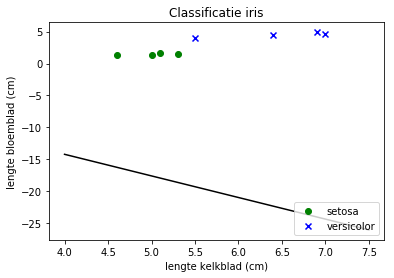

teller = 1
punt: [4.6 1.4] 	label: 1
ingevuld in rechte: 65.20670825407703
1
3.6947182824773663
0
gegiste klasse = 0
update= 0.1
gewichten = [ 2.61624345 12.96388244  3.83471828]
De grens is een rechte met vgl. 12.9638824358635 * x1 + 3.8347182824773665 * x2 + 2.6162434536366335 = 0


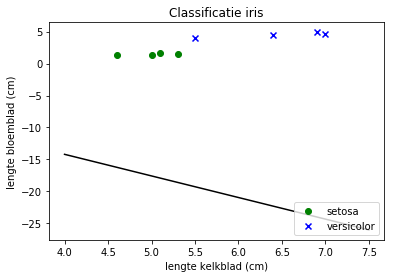

teller = 2
punt: [5.3 1.5] 	label: 1
ingevuld in rechte: 77.07689778742922
1
3.8347182824773665
0
gegiste klasse = 0
update= 0.1
gewichten = [ 2.71624345 13.49388244  3.98471828]
De grens is een rechte met vgl. 13.4938824358635 * x1 + 3.9847182824773664 * x2 + 2.7162434536366336 = 0


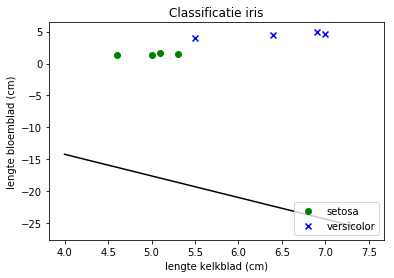

teller = 3
punt: [5.  1.4] 	label: 1
ingevuld in rechte: 75.76426122842246
1
3.9847182824773664
0
gegiste klasse = 0
update= 0.1
gewichten = [ 2.81624345 13.99388244  4.12471828]
De grens is een rechte met vgl. 13.9938824358635 * x1 + 4.1247182824773665 * x2 + 2.8162434536366336 = 0


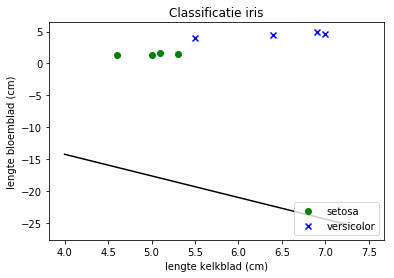

teller = 4
punt: [7.  4.7] 	label: 0
ingevuld in rechte: 120.15959643232475
1
4.1247182824773665
0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
ingevuld in rechte: 110.93832331431118
1
4.1247182824773665
0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
ingevuld in rechte: 119.58515184523388
1
4.1247182824773665
0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
ingevuld in rechte: 96.28146998079535
1
4.1247182824773665
0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
epoch = 7
teller = 0
punt: [5.1 1.6] 	label: 1
ingevuld in rechte: 80.78459312850426
1
4.1247182824773665
0
gegiste klasse = 0
update= 0.1
gewichten = [ 2.91624345 14.50388244  4.28471828]
De grens is een rechte met vgl. 14.503882435863499 * x1 + 4.284718282477367 * x2 + 2.9162434536366337 = 0


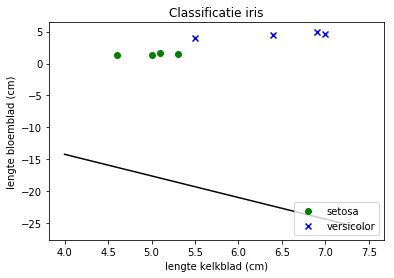

teller = 1
punt: [4.6 1.4] 	label: 1
ingevuld in rechte: 75.63270825407704
1
4.284718282477367
0
gegiste klasse = 0
update= 0.1
gewichten = [ 3.01624345 14.96388244  4.42471828]
De grens is een rechte met vgl. 14.9638824358635 * x1 + 4.424718282477366 * x2 + 3.016243453636634 = 0


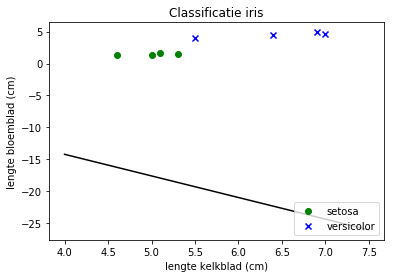

teller = 2
punt: [5.3 1.5] 	label: 1
ingevuld in rechte: 88.96189778742924
1
4.424718282477366
0
gegiste klasse = 0
update= 0.1
gewichten = [ 3.11624345 15.49388244  4.57471828]
De grens is een rechte met vgl. 15.4938824358635 * x1 + 4.574718282477367 * x2 + 3.116243453636634 = 0


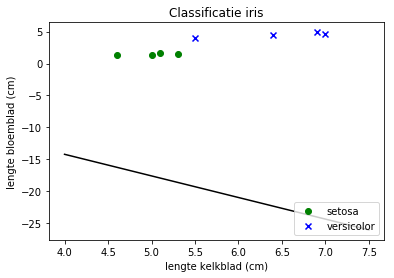

teller = 3
punt: [5.  1.4] 	label: 1
ingevuld in rechte: 86.99026122842244
1
4.574718282477367
0
gegiste klasse = 0
update= 0.1
gewichten = [ 3.21624345 15.99388244  4.71471828]
De grens is een rechte met vgl. 15.9938824358635 * x1 + 4.714718282477366 * x2 + 3.216243453636634 = 0


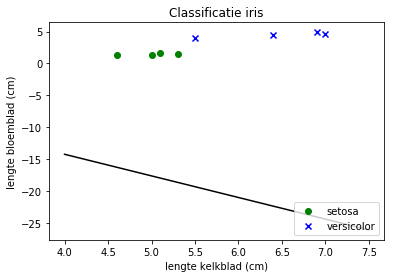

teller = 4
punt: [7.  4.7] 	label: 0
ingevuld in rechte: 137.33259643232475
1
4.714718282477366
0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
ingevuld in rechte: 126.79332331431118
1
4.714718282477366
0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
ingevuld in rechte: 136.67615184523387
1
4.714718282477366
0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
ingevuld in rechte: 110.04146998079536
1
4.714718282477366
0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
epoch = 8
teller = 0
punt: [5.1 1.6] 	label: 1
ingevuld in rechte: 92.32859312850425
1
4.714718282477366
0
gegiste klasse = 0
update= 0.1
gewichten = [ 3.31624345 16.50388244  4.87471828]
De grens is een rechte met vgl. 16.5038824358635 * x1 + 4.8747182824773665 * x2 + 3.316243453636634 = 0


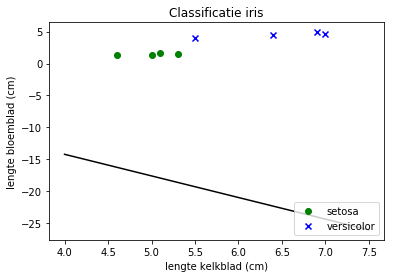

teller = 1
punt: [4.6 1.4] 	label: 1
ingevuld in rechte: 86.05870825407703
1
4.8747182824773665
0
gegiste klasse = 0
update= 0.1
gewichten = [ 3.41624345 16.96388244  5.01471828]
De grens is een rechte met vgl. 16.9638824358635 * x1 + 5.014718282477366 * x2 + 3.416243453636634 = 0


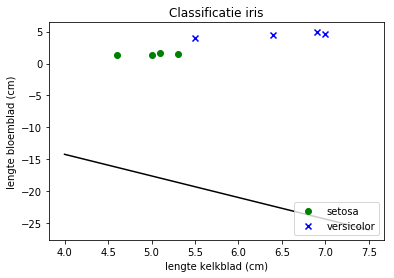

teller = 2
punt: [5.3 1.5] 	label: 1
ingevuld in rechte: 100.84689778742924
1
5.014718282477366
0
gegiste klasse = 0
update= 0.1
gewichten = [ 3.51624345 17.49388244  5.16471828]
De grens is een rechte met vgl. 17.4938824358635 * x1 + 5.1647182824773665 * x2 + 3.5162434536366343 = 0


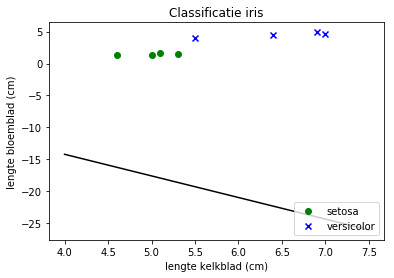

teller = 3
punt: [5.  1.4] 	label: 1
ingevuld in rechte: 98.21626122842245
1
5.1647182824773665
0
gegiste klasse = 0
update= 0.1
gewichten = [ 3.61624345 17.99388244  5.30471828]
De grens is een rechte met vgl. 17.9938824358635 * x1 + 5.304718282477366 * x2 + 3.6162434536366344 = 0


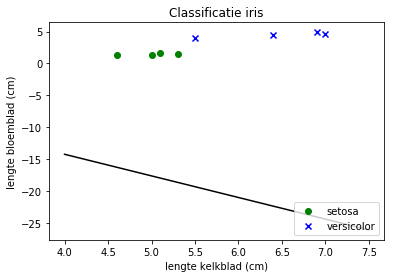

teller = 4
punt: [7.  4.7] 	label: 0
ingevuld in rechte: 154.50559643232475
1
5.304718282477366
0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
ingevuld in rechte: 142.6483233143112
1
5.304718282477366
0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
ingevuld in rechte: 153.76715184523388
1
5.304718282477366
0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
ingevuld in rechte: 123.80146998079535
1
5.304718282477366
0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
epoch = 9
teller = 0
punt: [5.1 1.6] 	label: 1
ingevuld in rechte: 103.87259312850426
1
5.304718282477366
0
gegiste klasse = 0
update= 0.1
gewichten = [ 3.71624345 18.50388244  5.46471828]
De grens is een rechte met vgl. 18.503882435863503 * x1 + 5.464718282477366 * x2 + 3.7162434536366344 = 0


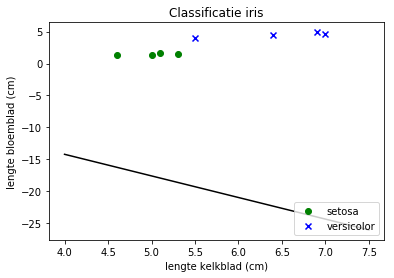

teller = 1
punt: [4.6 1.4] 	label: 1
ingevuld in rechte: 96.48470825407705
1
5.464718282477366
0
gegiste klasse = 0
update= 0.1
gewichten = [ 3.81624345 18.96388244  5.60471828]
De grens is een rechte met vgl. 18.963882435863503 * x1 + 5.604718282477366 * x2 + 3.8162434536366345 = 0


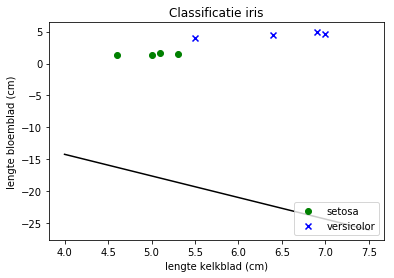

teller = 2
punt: [5.3 1.5] 	label: 1
ingevuld in rechte: 112.73189778742925
1
5.604718282477366
0
gegiste klasse = 0
update= 0.1
gewichten = [ 3.91624345 19.49388244  5.75471828]
De grens is een rechte met vgl. 19.493882435863505 * x1 + 5.754718282477366 * x2 + 3.9162434536366346 = 0


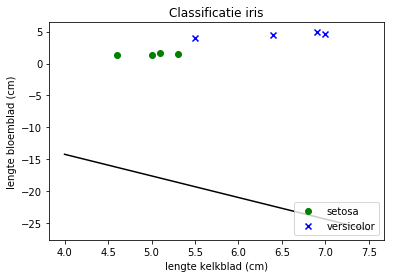

teller = 3
punt: [5.  1.4] 	label: 1
ingevuld in rechte: 109.44226122842247
1
5.754718282477366
0
gegiste klasse = 0
update= 0.1
gewichten = [ 4.01624345 19.99388244  5.89471828]
De grens is een rechte met vgl. 19.993882435863505 * x1 + 5.894718282477366 * x2 + 4.016243453636634 = 0


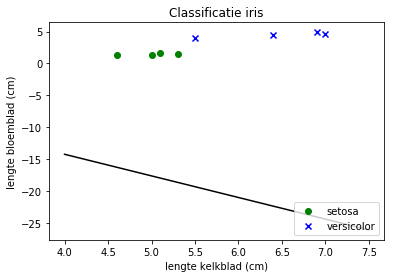

teller = 4
punt: [7.  4.7] 	label: 0
ingevuld in rechte: 171.67859643232478
1
5.894718282477366
0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
ingevuld in rechte: 158.50332331431122
1
5.894718282477366
0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
ingevuld in rechte: 170.85815184523392
1
5.894718282477366
0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
ingevuld in rechte: 137.56146998079538
1
5.894718282477366
0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]


In [14]:
# perceptron, leersnelheid 0.1 en 10 pogingen
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

Niet zo goed gelukt! De leersnelheid kan worden aangepast en misschien ook het aantal pogingen.<br>
Bij toenemend aantal epochs, blijft de fout constant, dit wijst op een te grote leersnelheid. 

Initiële willekeurige gewichten: [ 0.01624345 -0.00611756 -0.00528172]
De grens is een rechte met vgl. -0.006117564136500754 * x1 + -0.005281717522634557 * x2 + 0.01624345363663242 = 0


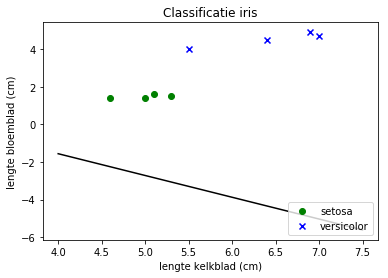

epoch = 0
teller = 0
punt: [5.1 1.6] 	label: 1
ingevuld in rechte: -0.02340687149573672
Klasse= 0
-0.005281717522634557
0
gegiste klasse = 0
update= 0.01
gewichten = [0.02624345 0.04488244 0.01071828]
De grens is een rechte met vgl. 0.04488243586349924 * x1 + 0.010718282477365443 * x2 + 0.02624345363663242 = 0


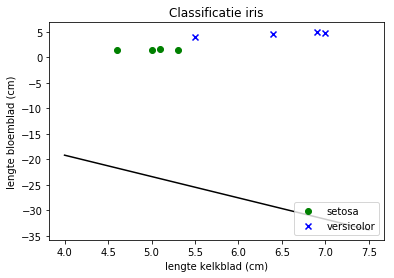

teller = 1
punt: [4.6 1.4] 	label: 1
ingevuld in rechte: 0.24770825407704053
Klasse= 1
0.010718282477365443
0
gegiste klasse = 0
update= 0.01
gewichten = [0.03624345 0.09088244 0.02471828]
De grens is een rechte met vgl. 0.09088243586349924 * x1 + 0.02471828247736544 * x2 + 0.03624345363663242 = 0


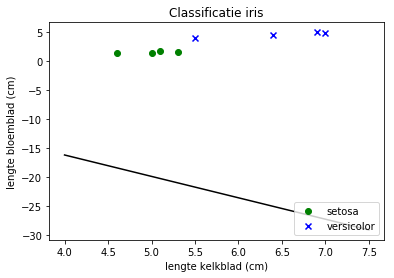

teller = 2
punt: [5.3 1.5] 	label: 1
ingevuld in rechte: 0.5549977874292266
Klasse= 1
0.02471828247736544
0
gegiste klasse = 0
update= 0.01
gewichten = [0.04624345 0.14388244 0.03971828]
De grens is een rechte met vgl. 0.14388243586349925 * x1 + 0.03971828247736544 * x2 + 0.046243453636632424 = 0


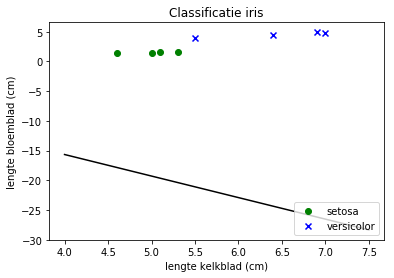

teller = 3
punt: [5.  1.4] 	label: 1
ingevuld in rechte: 0.8212612284224402
Klasse= 1
0.03971828247736544
0
gegiste klasse = 0
update= 0.01
gewichten = [0.05624345 0.19388244 0.05371828]
De grens is een rechte met vgl. 0.19388243586349924 * x1 + 0.05371828247736544 * x2 + 0.056243453636632426 = 0


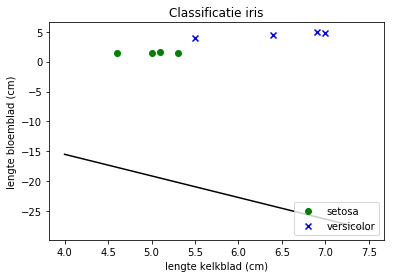

teller = 4
punt: [7.  4.7] 	label: 0
ingevuld in rechte: 1.665896432324745
Klasse= 1
0.05371828247736544
0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
ingevuld in rechte: 1.5388233143111723
Klasse= 1
0.05371828247736544
0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
ingevuld in rechte: 1.657251845233868
Klasse= 1
0.05371828247736544
0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
ingevuld in rechte: 1.33746998079534
Klasse= 1
0.05371828247736544
0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.04]
epoch = 1
teller = 0
punt: [5.1 1.6] 	label: 1
ingevuld in rechte: 1.1309931285042634
Klasse= 1
0.05371828247736544
0
gegiste klasse = 0
update= 0.01
gewichten = [0.06624345 0.24488244 0.06971828]
De grens is een rechte met vgl. 0.24488243586349923 * x1 + 0.06971828247736545 * x2 + 0.06624345363663242 = 0


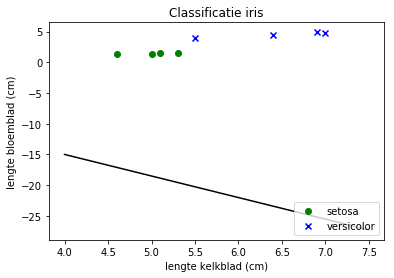

teller = 1
punt: [4.6 1.4] 	label: 1
ingevuld in rechte: 1.2903082540770403
Klasse= 1
0.06971828247736545
0
gegiste klasse = 0
update= 0.01
gewichten = [0.07624345 0.29088244 0.08371828]
De grens is een rechte met vgl. 0.2908824358634992 * x1 + 0.08371828247736544 * x2 + 0.07624345363663242 = 0


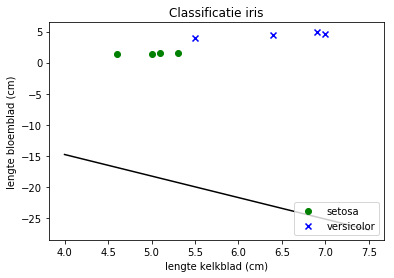

teller = 2
punt: [5.3 1.5] 	label: 1
ingevuld in rechte: 1.7434977874292261
Klasse= 1
0.08371828247736544
0
gegiste klasse = 0
update= 0.01
gewichten = [0.08624345 0.34388244 0.09871828]
De grens is een rechte met vgl. 0.3438824358634992 * x1 + 0.09871828247736544 * x2 + 0.08624345363663241 = 0


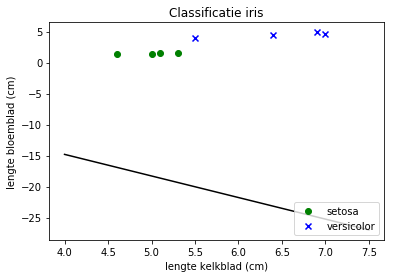

teller = 3
punt: [5.  1.4] 	label: 1
ingevuld in rechte: 1.9438612284224401
Klasse= 1
0.09871828247736544
0
gegiste klasse = 0
update= 0.01
gewichten = [0.09624345 0.39388244 0.11271828]
De grens is een rechte met vgl. 0.3938824358634992 * x1 + 0.11271828247736544 * x2 + 0.0962434536366324 = 0


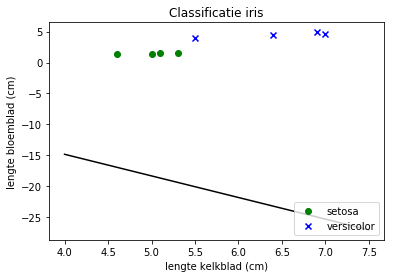

teller = 4
punt: [7.  4.7] 	label: 0
ingevuld in rechte: 3.3831964323247448
Klasse= 1
0.11271828247736544
0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
ingevuld in rechte: 3.124323314311172
Klasse= 1
0.11271828247736544
0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
ingevuld in rechte: 3.3663518452338677
Klasse= 1
0.11271828247736544
0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
ingevuld in rechte: 2.71346998079534
Klasse= 1
0.11271828247736544
0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.04, 0.04]
epoch = 2
teller = 0
punt: [5.1 1.6] 	label: 1
ingevuld in rechte: 2.285393128504263
Klasse= 1
0.11271828247736544
0
gegiste klasse = 0
update= 0.01
gewichten = [0.10624345 0.44488244 0.12871828]
De grens is een rechte met vgl. 0.4448824358634992 * x1 + 0.12871828247736544 * x2 + 0.1062434536366324 = 0


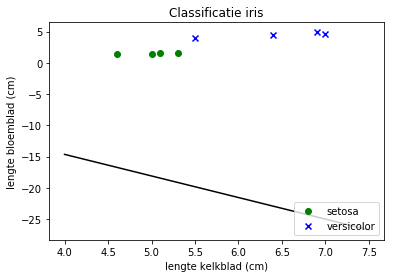

teller = 1
punt: [4.6 1.4] 	label: 1
ingevuld in rechte: 2.33290825407704
Klasse= 1
0.12871828247736544
0
gegiste klasse = 0
update= 0.01
gewichten = [0.11624345 0.49088244 0.14271828]
De grens is een rechte met vgl. 0.49088243586349917 * x1 + 0.14271828247736545 * x2 + 0.1162434536366324 = 0


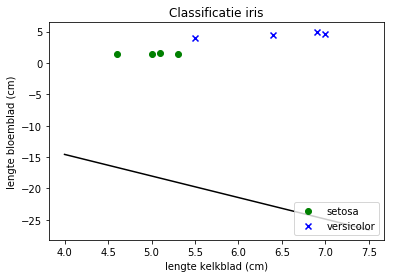

teller = 2
punt: [5.3 1.5] 	label: 1
ingevuld in rechte: 2.9319977874292262
Klasse= 1
0.14271828247736545
0
gegiste klasse = 0
update= 0.01
gewichten = [0.12624345 0.54388244 0.15771828]
De grens is een rechte met vgl. 0.5438824358634992 * x1 + 0.15771828247736547 * x2 + 0.1262434536366324 = 0


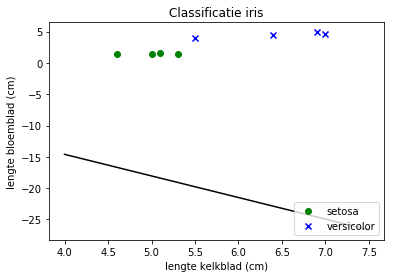

teller = 3
punt: [5.  1.4] 	label: 1
ingevuld in rechte: 3.0664612284224395
Klasse= 1
0.15771828247736547
0
gegiste klasse = 0
update= 0.01
gewichten = [0.13624345 0.59388244 0.17171828]
De grens is een rechte met vgl. 0.5938824358634992 * x1 + 0.17171828247736548 * x2 + 0.1362434536366324 = 0


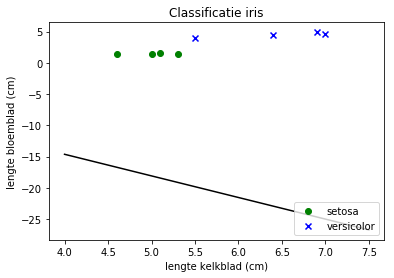

teller = 4
punt: [7.  4.7] 	label: 0
ingevuld in rechte: 5.1004964323247455
Klasse= 1
0.17171828247736548
0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
ingevuld in rechte: 4.709823314311172
Klasse= 1
0.17171828247736548
0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
ingevuld in rechte: 5.075451845233868
Klasse= 1
0.17171828247736548
0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
ingevuld in rechte: 4.08946998079534
Klasse= 1
0.17171828247736548
0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.04, 0.04, 0.04]
epoch = 3
teller = 0
punt: [5.1 1.6] 	label: 1
ingevuld in rechte: 3.439793128504263
Klasse= 1
0.17171828247736548
0
gegiste klasse = 0
update= 0.01
gewichten = [0.14624345 0.64488244 0.18771828]
De grens is een rechte met vgl. 0.6448824358634992 * x1 + 0.1877182824773655 * x2 + 0.1462434536366324 = 0


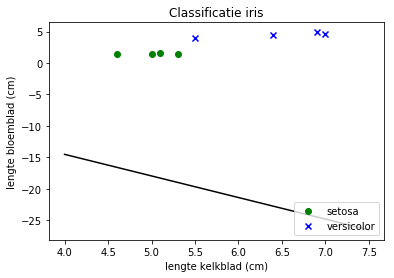

teller = 1
punt: [4.6 1.4] 	label: 1
ingevuld in rechte: 3.3755082540770402
Klasse= 1
0.1877182824773655
0
gegiste klasse = 0
update= 0.01
gewichten = [0.15624345 0.69088244 0.20171828]
De grens is een rechte met vgl. 0.6908824358634993 * x1 + 0.2017182824773655 * x2 + 0.15624345363663242 = 0


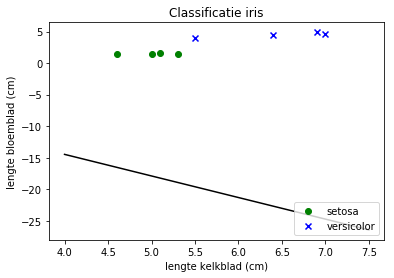

teller = 2
punt: [5.3 1.5] 	label: 1
ingevuld in rechte: 4.120497787429227
Klasse= 1
0.2017182824773655
0
gegiste klasse = 0
update= 0.01
gewichten = [0.16624345 0.74388244 0.21671828]
De grens is een rechte met vgl. 0.7438824358634993 * x1 + 0.21671828247736552 * x2 + 0.16624345363663243 = 0


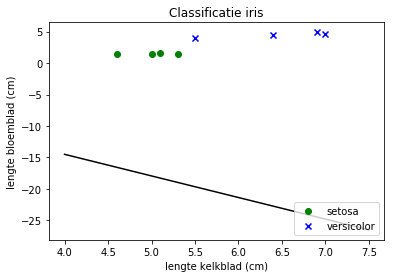

teller = 3
punt: [5.  1.4] 	label: 1
ingevuld in rechte: 4.1890612284224416
Klasse= 1
0.21671828247736552
0
gegiste klasse = 0
update= 0.01
gewichten = [0.17624345 0.79388244 0.23071828]
De grens is een rechte met vgl. 0.7938824358634994 * x1 + 0.23071828247736553 * x2 + 0.17624345363663244 = 0


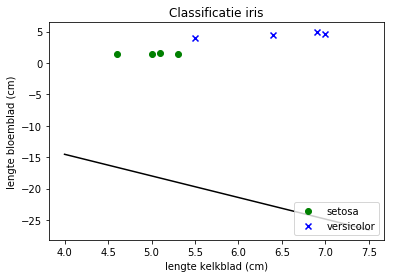

teller = 4
punt: [7.  4.7] 	label: 0
ingevuld in rechte: 6.817796432324747
Klasse= 1
0.23071828247736553
0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
ingevuld in rechte: 6.295323314311173
Klasse= 1
0.23071828247736553
0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
ingevuld in rechte: 6.78455184523387
Klasse= 1
0.23071828247736553
0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
ingevuld in rechte: 5.4654699807953415
Klasse= 1
0.23071828247736553
0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.04, 0.04, 0.04, 0.04]
epoch = 4
teller = 0
punt: [5.1 1.6] 	label: 1
ingevuld in rechte: 4.594193128504264
Klasse= 1
0.23071828247736553
0
gegiste klasse = 0
update= 0.01
gewichten = [0.18624345 0.84488244 0.24671828]
De grens is een rechte met vgl. 0.8448824358634994 * x1 + 0.24671828247736555 * x2 + 0.18624345363663244 = 0


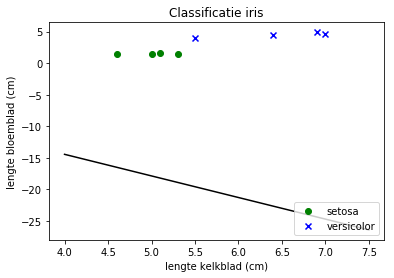

teller = 1
punt: [4.6 1.4] 	label: 1
ingevuld in rechte: 4.418108254077041
Klasse= 1
0.24671828247736555
0
gegiste klasse = 0
update= 0.01
gewichten = [0.19624345 0.89088244 0.26071828]
De grens is een rechte met vgl. 0.8908824358634995 * x1 + 0.26071828247736556 * x2 + 0.19624345363663245 = 0


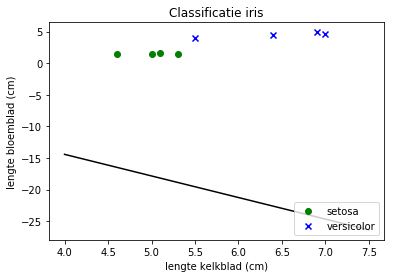

teller = 2
punt: [5.3 1.5] 	label: 1
ingevuld in rechte: 5.308997787429227
Klasse= 1
0.26071828247736556
0
gegiste klasse = 0
update= 0.01
gewichten = [0.20624345 0.94388244 0.27571828]
De grens is een rechte met vgl. 0.9438824358634995 * x1 + 0.2757182824773656 * x2 + 0.20624345363663246 = 0


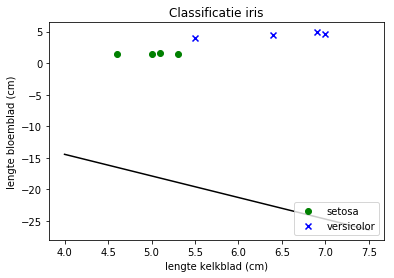

teller = 3
punt: [5.  1.4] 	label: 1
ingevuld in rechte: 5.311661228422443
Klasse= 1
0.2757182824773656
0
gegiste klasse = 0
update= 0.01
gewichten = [0.21624345 0.99388244 0.28971828]
De grens is een rechte met vgl. 0.9938824358634996 * x1 + 0.2897182824773656 * x2 + 0.21624345363663247 = 0


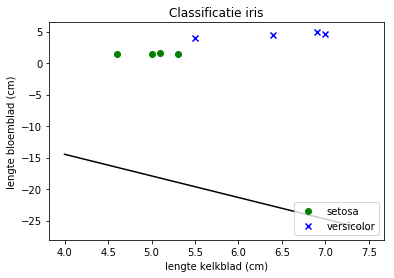

teller = 4
punt: [7.  4.7] 	label: 0
ingevuld in rechte: 8.535096432324748
Klasse= 1
0.2897182824773656
0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
ingevuld in rechte: 7.880823314311175
Klasse= 1
0.2897182824773656
0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
ingevuld in rechte: 8.493651845233872
Klasse= 1
0.2897182824773656
0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
ingevuld in rechte: 6.841469980795343
Klasse= 1
0.2897182824773656
0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.04, 0.04, 0.04, 0.04, 0.04]
epoch = 5
teller = 0
punt: [5.1 1.6] 	label: 1
ingevuld in rechte: 5.748593128504265
Klasse= 1
0.2897182824773656
0
gegiste klasse = 0
update= 0.01
gewichten = [0.22624345 1.04488244 0.30571828]
De grens is een rechte met vgl. 1.0448824358634996 * x1 + 0.3057182824773656 * x2 + 0.22624345363663248 = 0


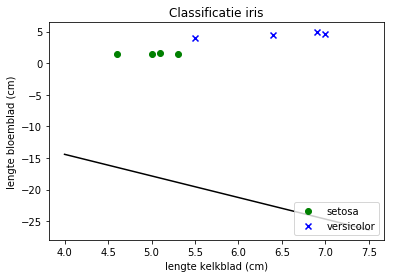

teller = 1
punt: [4.6 1.4] 	label: 1
ingevuld in rechte: 5.460708254077042
Klasse= 1
0.3057182824773656
0
gegiste klasse = 0
update= 0.01
gewichten = [0.23624345 1.09088244 0.31971828]
De grens is een rechte met vgl. 1.0908824358634996 * x1 + 0.3197182824773656 * x2 + 0.2362434536366325 = 0


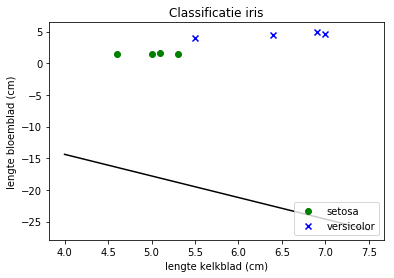

teller = 2
punt: [5.3 1.5] 	label: 1
ingevuld in rechte: 6.497497787429229
Klasse= 1
0.3197182824773656
0
gegiste klasse = 0
update= 0.01
gewichten = [0.24624345 1.14388244 0.33471828]
De grens is een rechte met vgl. 1.1438824358634996 * x1 + 0.3347182824773656 * x2 + 0.2462434536366325 = 0


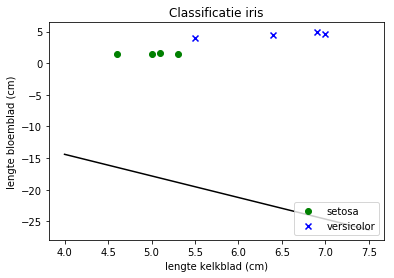

teller = 3
punt: [5.  1.4] 	label: 1
ingevuld in rechte: 6.434261228422443
Klasse= 1
0.3347182824773656
0
gegiste klasse = 0
update= 0.01
gewichten = [0.25624345 1.19388244 0.34871828]
De grens is een rechte met vgl. 1.1938824358634996 * x1 + 0.34871828247736564 * x2 + 0.2562434536366325 = 0


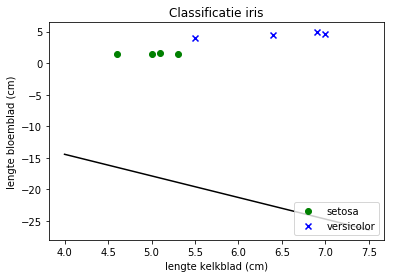

teller = 4
punt: [7.  4.7] 	label: 0
ingevuld in rechte: 10.252396432324748
Klasse= 1
0.34871828247736564
0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
ingevuld in rechte: 9.466323314311175
Klasse= 1
0.34871828247736564
0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
ingevuld in rechte: 10.202751845233871
Klasse= 1
0.34871828247736564
0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
ingevuld in rechte: 8.217469980795343
Klasse= 1
0.34871828247736564
0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.04, 0.04, 0.04, 0.04, 0.04, 0.04]
epoch = 6
teller = 0
punt: [5.1 1.6] 	label: 1
ingevuld in rechte: 6.902993128504265
Klasse= 1
0.34871828247736564
0
gegiste klasse = 0
update= 0.01
gewichten = [0.26624345 1.24488244 0.36471828]
De grens is een rechte met vgl. 1.2448824358634996 * x1 + 0.36471828247736565 * x2 + 0.2662434536366325 = 0


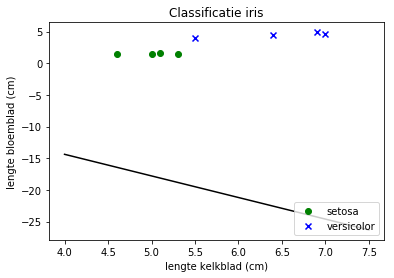

teller = 1
punt: [4.6 1.4] 	label: 1
ingevuld in rechte: 6.503308254077042
Klasse= 1
0.36471828247736565
0
gegiste klasse = 0
update= 0.01
gewichten = [0.27624345 1.29088244 0.37871828]
De grens is een rechte met vgl. 1.2908824358634996 * x1 + 0.37871828247736566 * x2 + 0.2762434536366325 = 0


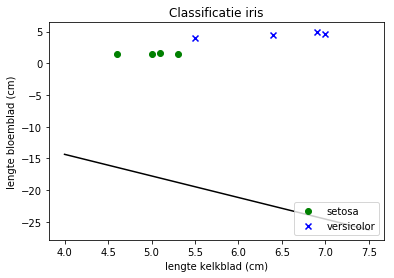

teller = 2
punt: [5.3 1.5] 	label: 1
ingevuld in rechte: 7.685997787429229
Klasse= 1
0.37871828247736566
0
gegiste klasse = 0
update= 0.01
gewichten = [0.28624345 1.34388244 0.39371828]
De grens is een rechte met vgl. 1.3438824358634995 * x1 + 0.3937182824773657 * x2 + 0.2862434536366325 = 0


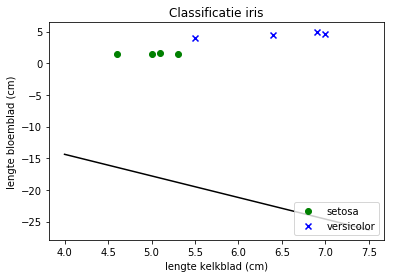

teller = 3
punt: [5.  1.4] 	label: 1
ingevuld in rechte: 7.556861228422443
Klasse= 1
0.3937182824773657
0
gegiste klasse = 0
update= 0.01
gewichten = [0.29624345 1.39388244 0.40771828]
De grens is een rechte met vgl. 1.3938824358634996 * x1 + 0.4077182824773657 * x2 + 0.2962434536366325 = 0


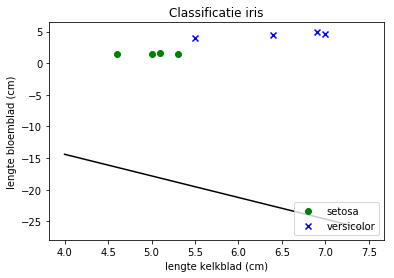

teller = 4
punt: [7.  4.7] 	label: 0
ingevuld in rechte: 11.96969643232475
Klasse= 1
0.4077182824773657
0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
ingevuld in rechte: 11.051823314311177
Klasse= 1
0.4077182824773657
0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
ingevuld in rechte: 11.911851845233873
Klasse= 1
0.4077182824773657
0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
ingevuld in rechte: 9.593469980795343
Klasse= 1
0.4077182824773657
0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]
epoch = 7
teller = 0
punt: [5.1 1.6] 	label: 1
ingevuld in rechte: 8.057393128504264
Klasse= 1
0.4077182824773657
0
gegiste klasse = 0
update= 0.01
gewichten = [0.30624345 1.44488244 0.42371828]
De grens is een rechte met vgl. 1.4448824358634995 * x1 + 0.4237182824773657 * x2 + 0.3062434536366325 = 0


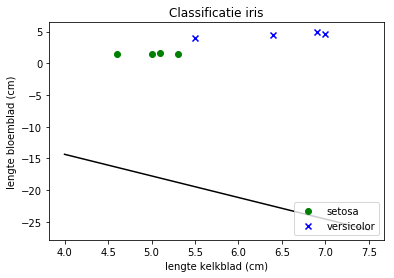

teller = 1
punt: [4.6 1.4] 	label: 1
ingevuld in rechte: 7.545908254077042
Klasse= 1
0.4237182824773657
0
gegiste klasse = 0
update= 0.01
gewichten = [0.31624345 1.49088244 0.43771828]
De grens is een rechte met vgl. 1.4908824358634996 * x1 + 0.4377182824773657 * x2 + 0.31624345363663253 = 0


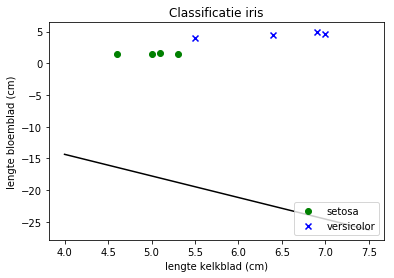

teller = 2
punt: [5.3 1.5] 	label: 1
ingevuld in rechte: 8.87449778742923
Klasse= 1
0.4377182824773657
0
gegiste klasse = 0
update= 0.01
gewichten = [0.32624345 1.54388244 0.45271828]
De grens is een rechte met vgl. 1.5438824358634995 * x1 + 0.45271828247736573 * x2 + 0.32624345363663254 = 0


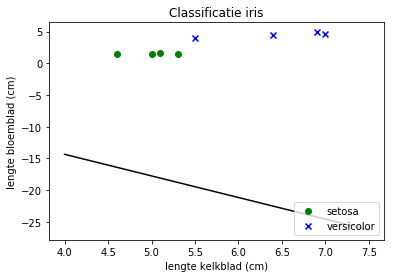

teller = 3
punt: [5.  1.4] 	label: 1
ingevuld in rechte: 8.679461228422442
Klasse= 1
0.45271828247736573
0
gegiste klasse = 0
update= 0.01
gewichten = [0.33624345 1.59388244 0.46671828]
De grens is een rechte met vgl. 1.5938824358634995 * x1 + 0.46671828247736574 * x2 + 0.33624345363663255 = 0


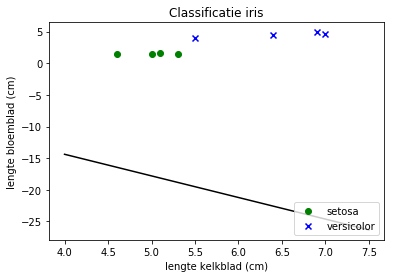

teller = 4
punt: [7.  4.7] 	label: 0
ingevuld in rechte: 13.686996432324749
Klasse= 1
0.46671828247736574
0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
ingevuld in rechte: 12.637323314311175
Klasse= 1
0.46671828247736574
0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
ingevuld in rechte: 13.620951845233872
Klasse= 1
0.46671828247736574
0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
ingevuld in rechte: 10.969469980795342
Klasse= 1
0.46671828247736574
0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]
epoch = 8
teller = 0
punt: [5.1 1.6] 	label: 1
ingevuld in rechte: 9.211793128504263
Klasse= 1
0.46671828247736574
0
gegiste klasse = 0
update= 0.01
gewichten = [0.34624345 1.64488244 0.48271828]
De grens is een rechte met vgl. 1.6448824358634995 * x1 + 0.48271828247736576 * x2 + 0.34624345363663256 = 0


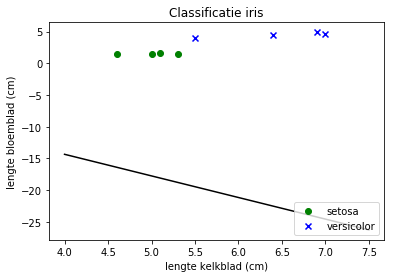

teller = 1
punt: [4.6 1.4] 	label: 1
ingevuld in rechte: 8.588508254077041
Klasse= 1
0.48271828247736576
0
gegiste klasse = 0
update= 0.01
gewichten = [0.35624345 1.69088244 0.49671828]
De grens is een rechte met vgl. 1.6908824358634995 * x1 + 0.49671828247736577 * x2 + 0.35624345363663257 = 0


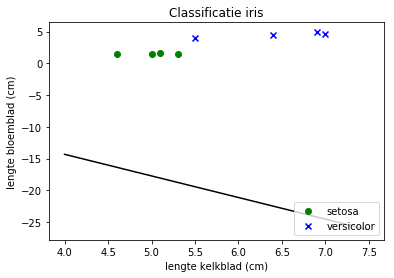

teller = 2
punt: [5.3 1.5] 	label: 1
ingevuld in rechte: 10.062997787429229
Klasse= 1
0.49671828247736577
0
gegiste klasse = 0
update= 0.01
gewichten = [0.36624345 1.74388244 0.51171828]
De grens is een rechte met vgl. 1.7438824358634994 * x1 + 0.5117182824773657 * x2 + 0.3662434536366326 = 0


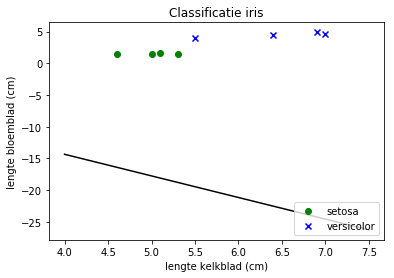

teller = 3
punt: [5.  1.4] 	label: 1
ingevuld in rechte: 9.802061228422444
Klasse= 1
0.5117182824773657
0
gegiste klasse = 0
update= 0.01
gewichten = [0.37624345 1.79388244 0.52571828]
De grens is een rechte met vgl. 1.7938824358634995 * x1 + 0.5257182824773657 * x2 + 0.3762434536366326 = 0


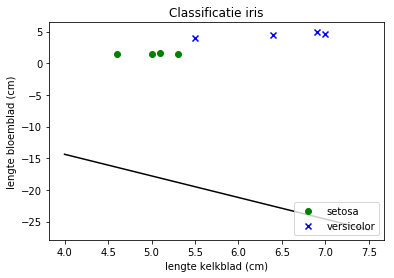

teller = 4
punt: [7.  4.7] 	label: 0
ingevuld in rechte: 15.404296432324749
Klasse= 1
0.5257182824773657
0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
ingevuld in rechte: 14.222823314311176
Klasse= 1
0.5257182824773657
0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
ingevuld in rechte: 15.330051845233871
Klasse= 1
0.5257182824773657
0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
ingevuld in rechte: 12.345469980795343
Klasse= 1
0.5257182824773657
0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]
epoch = 9
teller = 0
punt: [5.1 1.6] 	label: 1
ingevuld in rechte: 10.366193128504264
Klasse= 1
0.5257182824773657
0
gegiste klasse = 0
update= 0.01
gewichten = [0.38624345 1.84488244 0.54171828]
De grens is een rechte met vgl. 1.8448824358634994 * x1 + 0.5417182824773658 * x2 + 0.3862434536366326 = 0


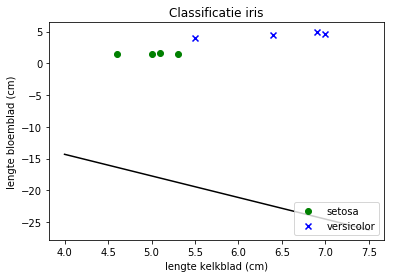

teller = 1
punt: [4.6 1.4] 	label: 1
ingevuld in rechte: 9.631108254077041
Klasse= 1
0.5417182824773658
0
gegiste klasse = 0
update= 0.01
gewichten = [0.39624345 1.89088244 0.55571828]
De grens is een rechte met vgl. 1.8908824358634995 * x1 + 0.5557182824773658 * x2 + 0.3962434536366326 = 0


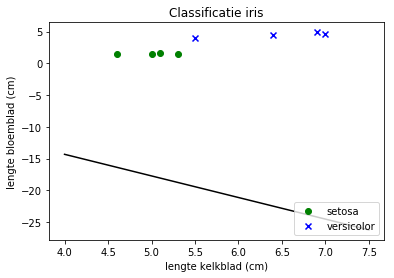

teller = 2
punt: [5.3 1.5] 	label: 1
ingevuld in rechte: 11.251497787429228
Klasse= 1
0.5557182824773658
0
gegiste klasse = 0
update= 0.01
gewichten = [0.40624345 1.94388244 0.57071828]
De grens is een rechte met vgl. 1.9438824358634994 * x1 + 0.5707182824773658 * x2 + 0.4062434536366326 = 0


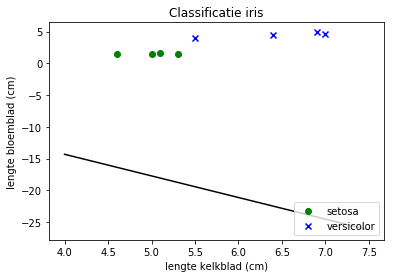

teller = 3
punt: [5.  1.4] 	label: 1
ingevuld in rechte: 10.924661228422442
Klasse= 1
0.5707182824773658
0
gegiste klasse = 0
update= 0.01
gewichten = [0.41624345 1.99388244 0.58471828]
De grens is een rechte met vgl. 1.9938824358634994 * x1 + 0.5847182824773658 * x2 + 0.4162434536366326 = 0


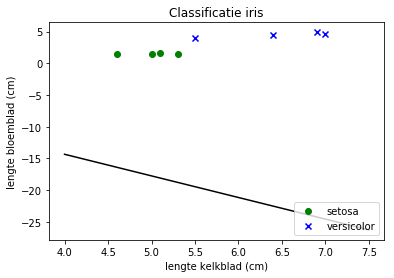

teller = 4
punt: [7.  4.7] 	label: 0
ingevuld in rechte: 17.121596432324747
Klasse= 1
0.5847182824773658
0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
ingevuld in rechte: 15.808323314311176
Klasse= 1
0.5847182824773658
0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
ingevuld in rechte: 17.03915184523387
Klasse= 1
0.5847182824773658
0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
ingevuld in rechte: 13.72146998079534
Klasse= 1
0.5847182824773658
0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]


In [18]:
# perceptron, leersnelheid 0.01 en 10 pogingen
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X,y)

Nog niet gelukt! Neem een nog kleinere leersnelheid.

Initiële willekeurige gewichten: [ 0.01624345 -0.00611756 -0.00528172]
De grens is een rechte met vgl. -0.006117564136500754 * x1 + -0.005281717522634557 * x2 + 0.01624345363663242 = 0


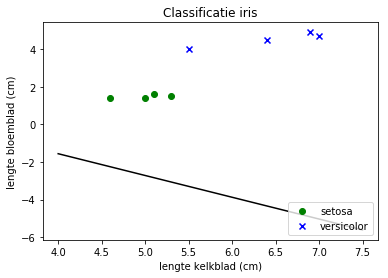

epoch = 0
teller = 0
punt: [5.1 1.6] 	label: 1
ingevuld in rechte: -0.02340687149573672
Klasse= 0
-0.005281717522634557
0
gegiste klasse = 0
update= 0.001
gewichten = [ 0.01724345 -0.00101756 -0.00368172]
De grens is een rechte met vgl. -0.0010175641365007546 * x1 + -0.0036817175226345573 * x2 + 0.01724345363663242 = 0


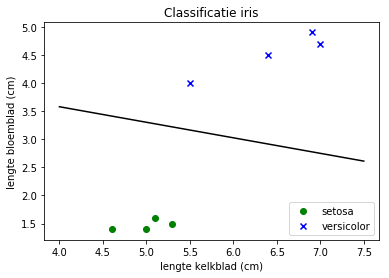

teller = 1
punt: [4.6 1.4] 	label: 1
ingevuld in rechte: 0.007408254077040568
Klasse= 1
-0.0036817175226345573
1
gegiste klasse = 1
update= 0.0
teller = 2
punt: [5.3 1.5] 	label: 1
ingevuld in rechte: 0.0063277874292265845
Klasse= 1
-0.0036817175226345573
1
gegiste klasse = 1
update= 0.0
teller = 3
punt: [5.  1.4] 	label: 1
ingevuld in rechte: 0.007001228422440267
Klasse= 1
-0.0036817175226345573
1
gegiste klasse = 1
update= 0.0
teller = 4
punt: [7.  4.7] 	label: 0
ingevuld in rechte: -0.007183567675255284
Klasse= 0
-0.0036817175226345573
0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
ingevuld in rechte: -0.005836685688827916
Klasse= 0
-0.0036817175226345573
0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
ingevuld in rechte: -0.007818154766132117
Klasse= 0
-0.0036817175226345573
0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
ingevuld in rechte: -0.003080019204659959
Klasse= 0
-0.0036817175226345573
0
gegiste klasse = 0

In [19]:
# perceptron, leersnelheid 0.001 en 10 pogingen
ppn = Perceptron(eta=0.001, n_iter=10)
ppn.fit(X,y)

Gelukt! En blijkbaar al heel snel.

## 4.3 Met 1 neuron (perceptron), andere manier

Als twee klassen lineair scheidbaar zijn, kan men een rechte vinden die beide klassen scheidt. Men kan de vergelijking van de scheidingslijn zodanig opschrijven (in de vorm ax+by+c=0) dat voor elk punt (x1, y1) in de ene klasse ax1+by1+c >= 0 en voor elk punt (x1, y1) in de andere klasse ax1 +by1+c < 0. <br> 
Zolang dit niet voldaan is, moeten de coëfficiënten worden aangepast.<br>
De trainingset met bijhorende labels wordt enkele keren doorlopen. Voor elk punt worden de coëfficiënten aangepast indien nodig.

In [20]:
def grafiek(cte, coeff_x1, coeff_x2):
        """Plot scheidingsrechte ('decision boundary') en geeft vergelijking ervan."""
        # lengte bloemblad t.o.v. lengte kelkblad
        plt.scatter(x1[:4], x2[:4], color="green", marker="o", label="setosa")      # setosa zijn eerste 50
        plt.scatter(x1[4:], x2[4:], color="blue", marker="x", label="versicolor")   # versicolor zijn de volgende 50
        x = np.linspace(4, 7.5, 10)
        y_r = -coeff_x1/coeff_x2 * x - cte/coeff_x2
        print("De grens is een rechte met vgl.", coeff_x1, "* x1 +", coeff_x2, "* x2 +", cte, "= 0")
        plt.plot(x, y_r, color="black")
        plt.title("Classificatie iris")
        plt.xlabel("lengte kelkblad (cm)")
        plt.ylabel("lengte bloemblad (cm)")
        plt.legend(loc="lower right")
        plt.show()


class Perceptron2(object):
    """Perceptron classifier.""" 
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        """self heeft drie parameters: leersnelheid, aantal pogingen, willekeurigheid."""
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        # kolommatrix van de gewichten ('weights')
        # willekeurig gegenereerd uit normale verdeling met gemiddelde 0 en standaardafwijking 0.01
        # aantal gewichten is aantal kenmerken in X plus 1 (+1 voor de bias)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]+1)     # gewichtenmatrix
        print("Initiële willekeurige gewichten:", self.w_)
        self.errors_ = []    # foutenlijst
        
        cte, coeff_x1, coeff_x2 = self.w_[0], self.w_[1], self.w_[2]
        # plot grafiek met scheidingsrechte
        grafiek(cte, coeff_x1, coeff_x2)
        
        # gewichten punt per punt aanpassen, gebaseerd op feedback, gedurende verschillende pogingen        
        for _ in range(self.n_iter):
            print("epoch =", _)
            errors = 0
            teller = 0
            for x, label in zip(X, y):            # x is datapunt, y overeenkomstig label
                print("teller =", teller)          # tel punten, het zijn er acht
                print("punt:", x, "\tlabel:", label)
                gegiste_klasse = self.predict(x)
                print("gegiste klasse =", gegiste_klasse)
                # aanpassing nagaan voor dit punt
                update = self.eta * (label - gegiste_klasse)     # als update = 0, juiste klasse, geen aanpassing nodig
                print("update=", update)
                # grafiek en gewichten eventueel aanpassen na dit punt
                if update !=0:
                    self.w_[1:] += update *x
                    self.w_[0] += update
                    errors += update
                    print("gewichten =", self.w_)
                    cte, coeff_x1, coeff_x2 = self.w_[0], self.w_[1], self.w_[2]
                    grafiek(cte, coeff_x1, coeff_x2)
                teller += 1
            self.errors_.append(errors)           # na alle punten, totale fout toevoegen aan foutenlijst
            print("foutenlijst =", self.errors_)
        return self        # geeft gewichtenmatrix en errorlijst terug
    
    def net_input(self, X):      # punt invullen in de voorlopige scheidingsrechte
        """Berekenen van z = lineaire combinatie van de xi + bias voor elke gegeven punt."""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Gist klasse."""
        klasse = np.where(self.net_input(X) >=0, 1, 0)
        return klasse
    

Initiële willekeurige gewichten: [ 0.01624345 -0.00611756 -0.00528172]
De grens is een rechte met vgl. -0.006117564136500754 * x1 + -0.005281717522634557 * x2 + 0.01624345363663242 = 0


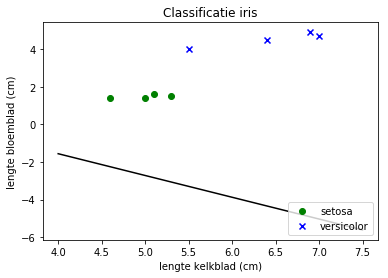

epoch = 0
teller = 0
punt: [5.1 1.6] 	label: 1
gegiste klasse = 0
update= 0.01
gewichten = [0.02624345 0.04488244 0.01071828]
De grens is een rechte met vgl. 0.04488243586349924 * x1 + 0.010718282477365443 * x2 + 0.02624345363663242 = 0


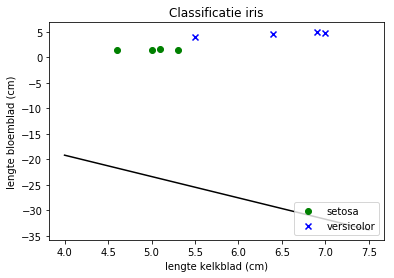

teller = 1
punt: [4.6 1.4] 	label: 1
gegiste klasse = 1
update= 0.0
teller = 2
punt: [5.3 1.5] 	label: 1
gegiste klasse = 1
update= 0.0
teller = 3
punt: [5.  1.4] 	label: 1
gegiste klasse = 1
update= 0.0
teller = 4
punt: [7.  4.7] 	label: 0
gegiste klasse = 1
update= -0.01
gewichten = [ 0.01624345 -0.02511756 -0.03628172]
De grens is een rechte met vgl. -0.025117564136500764 * x1 + -0.03628171752263456 * x2 + 0.01624345363663242 = 0


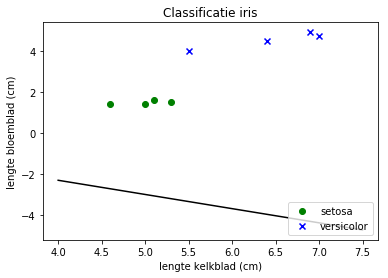

teller = 5
punt: [6.4 4.5] 	label: 0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.0]
epoch = 1
teller = 0
punt: [5.1 1.6] 	label: 1
gegiste klasse = 0
update= 0.01
gewichten = [ 0.02624345  0.02588244 -0.02028172]
De grens is een rechte met vgl. 0.025882435863499233 * x1 + -0.02028171752263456 * x2 + 0.02624345363663242 = 0


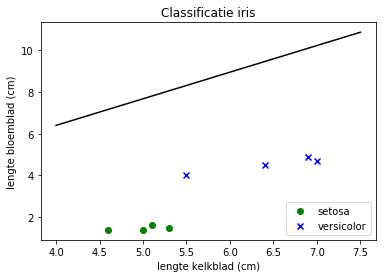

teller = 1
punt: [4.6 1.4] 	label: 1
gegiste klasse = 1
update= 0.0
teller = 2
punt: [5.3 1.5] 	label: 1
gegiste klasse = 1
update= 0.0
teller = 3
punt: [5.  1.4] 	label: 1
gegiste klasse = 1
update= 0.0
teller = 4
punt: [7.  4.7] 	label: 0
gegiste klasse = 1
update= -0.01
gewichten = [ 0.01624345 -0.04411756 -0.06728172]
De grens is een rechte met vgl. -0.044117564136500774 * x1 + -0.06728171752263457 * x2 + 0.01624345363663242 = 0


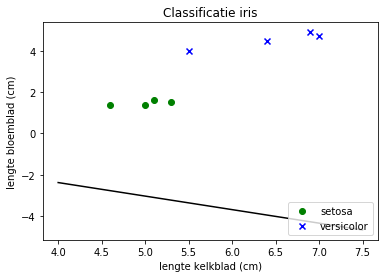

teller = 5
punt: [6.4 4.5] 	label: 0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.0, 0.0]
epoch = 2
teller = 0
punt: [5.1 1.6] 	label: 1
gegiste klasse = 0
update= 0.01
gewichten = [ 0.02624345  0.00688244 -0.05128172]
De grens is een rechte met vgl. 0.006882435863499223 * x1 + -0.051281717522634565 * x2 + 0.02624345363663242 = 0


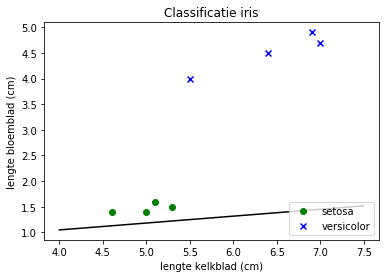

teller = 1
punt: [4.6 1.4] 	label: 1
gegiste klasse = 0
update= 0.01
gewichten = [ 0.03624345  0.05288244 -0.03728172]
De grens is een rechte met vgl. 0.05288243586349922 * x1 + -0.037281717522634567 * x2 + 0.03624345363663242 = 0


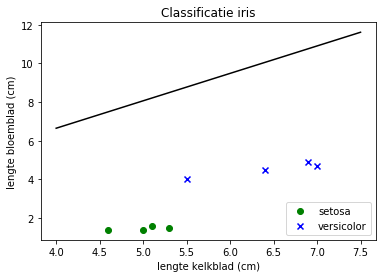

teller = 2
punt: [5.3 1.5] 	label: 1
gegiste klasse = 1
update= 0.0
teller = 3
punt: [5.  1.4] 	label: 1
gegiste klasse = 1
update= 0.0
teller = 4
punt: [7.  4.7] 	label: 0
gegiste klasse = 1
update= -0.01
gewichten = [ 0.02624345 -0.01711756 -0.08428172]
De grens is een rechte met vgl. -0.017117564136500785 * x1 + -0.08428171752263457 * x2 + 0.02624345363663242 = 0


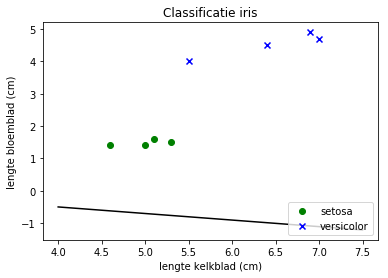

teller = 5
punt: [6.4 4.5] 	label: 0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.0, 0.0, 0.01]
epoch = 3
teller = 0
punt: [5.1 1.6] 	label: 1
gegiste klasse = 0
update= 0.01
gewichten = [ 0.03624345  0.03388244 -0.06828172]
De grens is een rechte met vgl. 0.03388243586349921 * x1 + -0.06828171752263457 * x2 + 0.03624345363663242 = 0


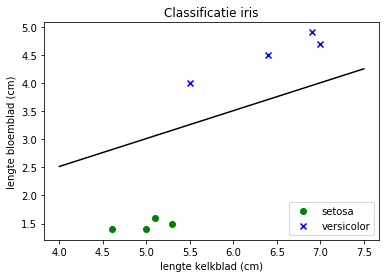

teller = 1
punt: [4.6 1.4] 	label: 1
gegiste klasse = 1
update= 0.0
teller = 2
punt: [5.3 1.5] 	label: 1
gegiste klasse = 1
update= 0.0
teller = 3
punt: [5.  1.4] 	label: 1
gegiste klasse = 1
update= 0.0
teller = 4
punt: [7.  4.7] 	label: 0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
gegiste klasse = 0
update= 0.0
teller = 7
punt: [5.5 4. ] 	label: 0
gegiste klasse = 0
update= 0.0
foutenlijst = [0.0, 0.0, 0.01, 0.01]
epoch = 4
teller = 0
punt: [5.1 1.6] 	label: 1
gegiste klasse = 1
update= 0.0
teller = 1
punt: [4.6 1.4] 	label: 1
gegiste klasse = 1
update= 0.0
teller = 2
punt: [5.3 1.5] 	label: 1
gegiste klasse = 1
update= 0.0
teller = 3
punt: [5.  1.4] 	label: 1
gegiste klasse = 1
update= 0.0
teller = 4
punt: [7.  4.7] 	label: 0
gegiste klasse = 0
update= 0.0
teller = 5
punt: [6.4 4.5] 	label: 0
gegiste klasse = 0
update= 0.0
teller = 6
punt: [6.9 4.9] 	label: 0
gegiste klasse = 0
update= 0.0
t

In [21]:
# perceptron, leersnelheid 0.01 en 15 pogingen
ppn = Perceptron2(eta=0.01, n_iter=15)
ppn.fit(X,y)

Gelukt!

## 4.4 Probeer eens hetzelfde met twee andere kenmerken, bv. lengte kelkblad t.o.v. breedte kelkblad

In [22]:
# setosa en versicolor selecteren
# breedte kelkblad en lengte bloemblad selecteren
X2 = iris.iloc[46:54, [0, 1]].values  # gekozen irissen zijn de eerste 100, gekozen kenmerken in eerste en tweede kolom 
# X[:]
# print(X)
X2.shape        # X is een matrix met 100 rijen en 2 kolommen

(8, 2)

In [23]:
print(X2[:, 0])    # eerste kolom: breedte kelkblad
print(X2[:, 1])    # tweede kolom: lengte bloemblad

[5.1 4.6 5.3 5.  7.  6.4 6.9 5.5]
[3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3]


In [24]:
x21 = X2[:, 0]
x22 = X2[:, 1]

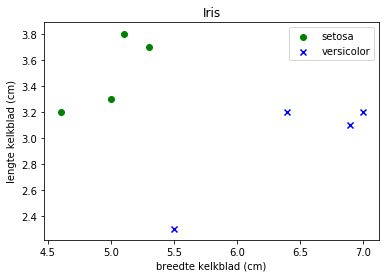

In [26]:
# lengte bloemblad t.o.v. breedte kelkblad
plt.scatter(x21[:4], x22[:4], color="green", marker="o", label="setosa")      # setosa zijn eerste 50
plt.scatter(x21[4:], x22[4:], color="blue", marker="x", label="versicolor")   # versicolor zijn volgende 50
           
plt.title("Iris")
plt.xlabel("breedte kelkblad (cm)")
plt.ylabel("lengte kelkblad (cm)")
plt.legend(loc="upper right")
plt.show()

De punten zijn lineair scheidbaar.

In [27]:
y2 = iris.iloc[46:54, 4].values             # labels, laatste kolom van de oorspronkelijke tabel
y2 = np.where(y2 == "Iris-setosa", 1, 0)     # labels numeriek maken, setosa:1, versicolor:0

In [28]:
def grafiek(X2, cte2, coeff_x21, coeff_x22):
        """Plot decision boundary"""
        # breedte kelkblad t.o.v. lengte kelkblad
        plt.scatter(x21[:4], x22[:4], color="green", marker="o", label="setosa")      # setosa zijn eerste 50
        plt.scatter(x21[4:], x22[4:], color="blue", marker="x", label="versicolor")   # versicolor zijn de volgende 50
        x = np.linspace(2, 8, 20)
        y_r = -coeff_x21/coeff_x22 * x - cte2/coeff_x22
        print("rechte met vgl.", coeff_x21, "* x +", coeff_x22, "* x2 +", cte2, "= 0")
        plt.plot(x, y_r, color="black")
        plt.title("Iris")
        plt.xlabel("breedte kelkblad (cm)")
        plt.ylabel("lengte kelkblad (cm)")
        plt.legend(loc="lower right")
        plt.show()


class Perceptron22(object):
    """Perceptron classifier.""" 
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        """self heeft drie parameters."""
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X2, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        # kolommatrix van de weights, willekeurig gegenereerd uit normale verdeling met gemiddelde 0 en standaardafwijking 0.01
        # aantal weights is aantal kenmerken in X + 1 (+1 voor de bias)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]+1)     #gewichtenmatrix
        print("initiële random gewichten =", self.w_)
        self.errors_ = []    # foutenlijst
        
        cte2, coeff_x21, coeff_x22 = self.w_[0], self.w_[1], self.w_[2]
        grafiek(X2, cte2, coeff_x21, coeff_x22)
                
        for _ in range(self.n_iter):
            print("epoch =", _)
            errors = 0
            teller = 0
            for x, target in zip(X2, y2):
                print("teller =", teller)
                print(x, target)
                print("predict =", self.predict(x))
                update = self.eta * (target - self.predict(x))
                self.w_[1:] += update *x
                self.w_[0] += update
                if update !=0:
                    errors += update
                    print("gewichten =", self.w_)
                    cte2, coeff_x21, coeff_x22 = self.w_[0], self.w_[1], self.w_[2]
                    grafiek(X2, cte2, coeff_x21, coeff_x22)
                teller += 1
            self.errors_.append(errors)
            print("foutenlijst =", self.errors_)
            # voorlopige 'decision boundary'
            cte2, coeff_x21, coeff_x22 = self.w_[0], self.w_[1], self.w_[2]
            grafiek(X2, cte2, coeff_x21, coeff_x22)
        return self        # geeft gewichtenmatrix en errorlijst terug
    
    def net_input(self, X2):
        """Berekenen van z = lineaire combinatie van de xi + bias voor elke gegeven punt."""
        return np.dot(X2, self.w_[1:]) + self.w_[0]
    
    def predict(self, X2):
        """Geeft klasse."""
        return np.where(self.net_input(X2) >=0, 1, 0)
    

initiële random gewichten = [ 0.01624345 -0.00611756 -0.00528172]
rechte met vgl. -0.006117564136500754 * x + -0.005281717522634557 * x2 + 0.01624345363663242 = 0


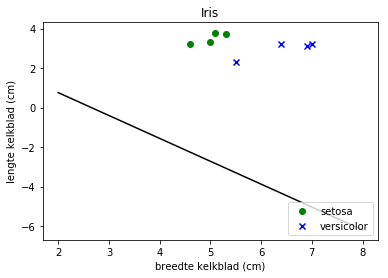

epoch = 0
teller = 0
[5.1 3.8] 1
predict = 0
gewichten = [0.11624345 0.50388244 0.37471828]
rechte met vgl. 0.5038824358634992 * x + 0.37471828247736544 * x2 + 0.11624345363663242 = 0


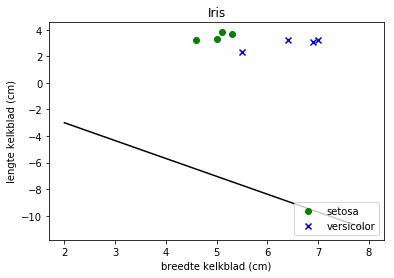

teller = 1
[4.6 3.2] 1
predict = 1
teller = 2
[5.3 3.7] 1
predict = 1
teller = 3
[5.  3.3] 1
predict = 1
teller = 4
[7.  3.2] 0
predict = 1
gewichten = [ 0.01624345 -0.19611756  0.05471828]
rechte met vgl. -0.19611756413650083 * x + 0.054718282477365376 * x2 + 0.01624345363663242 = 0


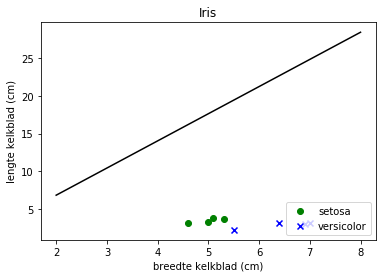

teller = 5
[6.4 3.2] 0
predict = 0
teller = 6
[6.9 3.1] 0
predict = 0
teller = 7
[5.5 2.3] 0
predict = 0
foutenlijst = [0.0]
rechte met vgl. -0.19611756413650083 * x + 0.054718282477365376 * x2 + 0.01624345363663242 = 0


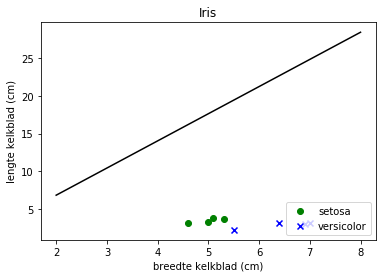

epoch = 1
teller = 0
[5.1 3.8] 1
predict = 0
gewichten = [0.11624345 0.31388244 0.43471828]
rechte met vgl. 0.3138824358634992 * x + 0.4347182824773654 * x2 + 0.11624345363663242 = 0


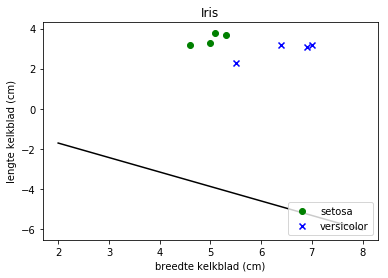

teller = 1
[4.6 3.2] 1
predict = 1
teller = 2
[5.3 3.7] 1
predict = 1
teller = 3
[5.  3.3] 1
predict = 1
teller = 4
[7.  3.2] 0
predict = 1
gewichten = [ 0.01624345 -0.38611756  0.11471828]
rechte met vgl. -0.3861175641365009 * x + 0.11471828247736532 * x2 + 0.01624345363663242 = 0


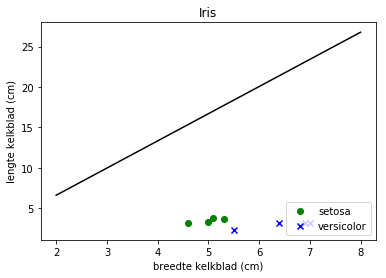

teller = 5
[6.4 3.2] 0
predict = 0
teller = 6
[6.9 3.1] 0
predict = 0
teller = 7
[5.5 2.3] 0
predict = 0
foutenlijst = [0.0, 0.0]
rechte met vgl. -0.3861175641365009 * x + 0.11471828247736532 * x2 + 0.01624345363663242 = 0


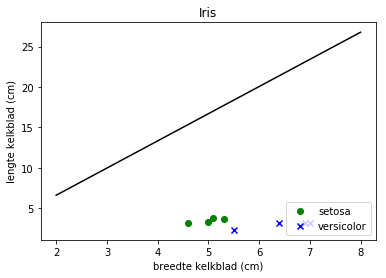

epoch = 2
teller = 0
[5.1 3.8] 1
predict = 0
gewichten = [0.11624345 0.12388244 0.49471828]
rechte met vgl. 0.12388243586349912 * x + 0.4947182824773653 * x2 + 0.11624345363663242 = 0


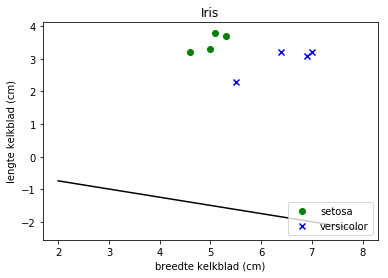

teller = 1
[4.6 3.2] 1
predict = 1
teller = 2
[5.3 3.7] 1
predict = 1
teller = 3
[5.  3.3] 1
predict = 1
teller = 4
[7.  3.2] 0
predict = 1
gewichten = [ 0.01624345 -0.57611756  0.17471828]
rechte met vgl. -0.576117564136501 * x + 0.17471828247736526 * x2 + 0.01624345363663242 = 0


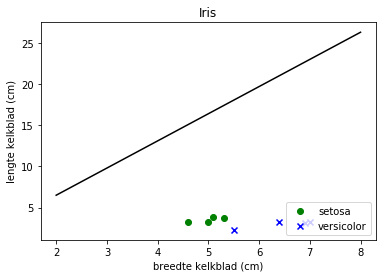

teller = 5
[6.4 3.2] 0
predict = 0
teller = 6
[6.9 3.1] 0
predict = 0
teller = 7
[5.5 2.3] 0
predict = 0
foutenlijst = [0.0, 0.0, 0.0]
rechte met vgl. -0.576117564136501 * x + 0.17471828247736526 * x2 + 0.01624345363663242 = 0


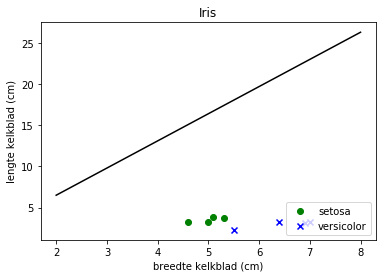

epoch = 3
teller = 0
[5.1 3.8] 1
predict = 0
gewichten = [ 0.11624345 -0.06611756  0.55471828]
rechte met vgl. -0.06611756413650094 * x + 0.5547182824773653 * x2 + 0.11624345363663242 = 0


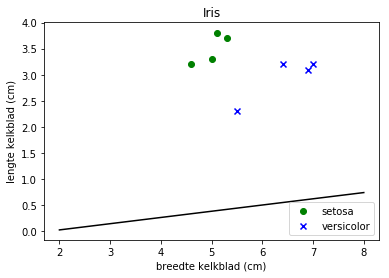

teller = 1
[4.6 3.2] 1
predict = 1
teller = 2
[5.3 3.7] 1
predict = 1
teller = 3
[5.  3.3] 1
predict = 1
teller = 4
[7.  3.2] 0
predict = 1
gewichten = [ 0.01624345 -0.76611756  0.23471828]
rechte met vgl. -0.766117564136501 * x + 0.23471828247736526 * x2 + 0.01624345363663242 = 0


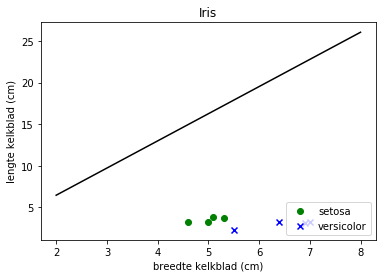

teller = 5
[6.4 3.2] 0
predict = 0
teller = 6
[6.9 3.1] 0
predict = 0
teller = 7
[5.5 2.3] 0
predict = 0
foutenlijst = [0.0, 0.0, 0.0, 0.0]
rechte met vgl. -0.766117564136501 * x + 0.23471828247736526 * x2 + 0.01624345363663242 = 0


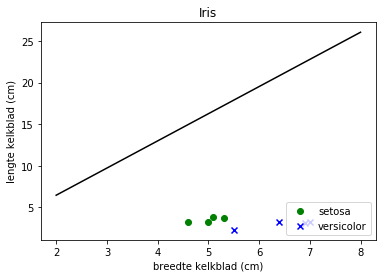

epoch = 4
teller = 0
[5.1 3.8] 1
predict = 0
gewichten = [ 0.11624345 -0.25611756  0.61471828]
rechte met vgl. -0.256117564136501 * x + 0.6147182824773653 * x2 + 0.11624345363663242 = 0


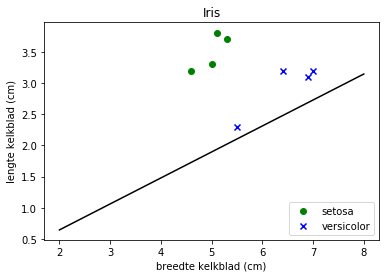

teller = 1
[4.6 3.2] 1
predict = 1
teller = 2
[5.3 3.7] 1
predict = 1
teller = 3
[5.  3.3] 1
predict = 1
teller = 4
[7.  3.2] 0
predict = 1
gewichten = [ 0.01624345 -0.95611756  0.29471828]
rechte met vgl. -0.9561175641365011 * x + 0.2947182824773652 * x2 + 0.01624345363663242 = 0


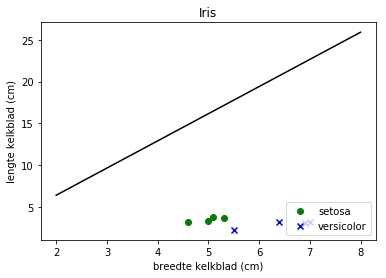

teller = 5
[6.4 3.2] 0
predict = 0
teller = 6
[6.9 3.1] 0
predict = 0
teller = 7
[5.5 2.3] 0
predict = 0
foutenlijst = [0.0, 0.0, 0.0, 0.0, 0.0]
rechte met vgl. -0.9561175641365011 * x + 0.2947182824773652 * x2 + 0.01624345363663242 = 0


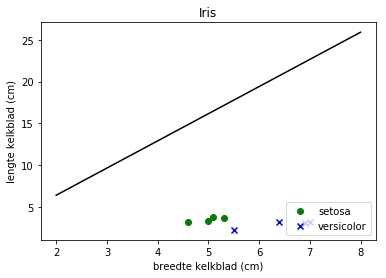

epoch = 5
teller = 0
[5.1 3.8] 1
predict = 0
gewichten = [ 0.11624345 -0.44611756  0.67471828]
rechte met vgl. -0.44611756413650105 * x + 0.6747182824773652 * x2 + 0.11624345363663242 = 0


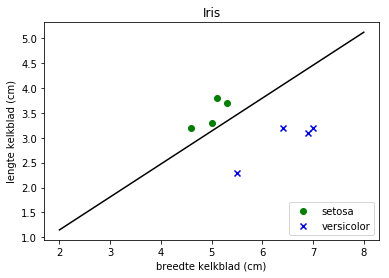

teller = 1
[4.6 3.2] 1
predict = 1
teller = 2
[5.3 3.7] 1
predict = 1
teller = 3
[5.  3.3] 1
predict = 1
teller = 4
[7.  3.2] 0
predict = 0
teller = 5
[6.4 3.2] 0
predict = 0
teller = 6
[6.9 3.1] 0
predict = 0
teller = 7
[5.5 2.3] 0
predict = 0
foutenlijst = [0.0, 0.0, 0.0, 0.0, 0.0, 0.1]
rechte met vgl. -0.44611756413650105 * x + 0.6747182824773652 * x2 + 0.11624345363663242 = 0


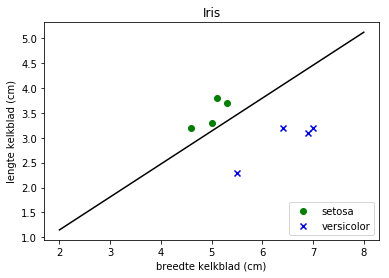

epoch = 6
teller = 0
[5.1 3.8] 1
predict = 1
teller = 1
[4.6 3.2] 1
predict = 1
teller = 2
[5.3 3.7] 1
predict = 1
teller = 3
[5.  3.3] 1
predict = 1
teller = 4
[7.  3.2] 0
predict = 0
teller = 5
[6.4 3.2] 0
predict = 0
teller = 6
[6.9 3.1] 0
predict = 0
teller = 7
[5.5 2.3] 0
predict = 0
foutenlijst = [0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0]
rechte met vgl. -0.44611756413650105 * x + 0.6747182824773652 * x2 + 0.11624345363663242 = 0


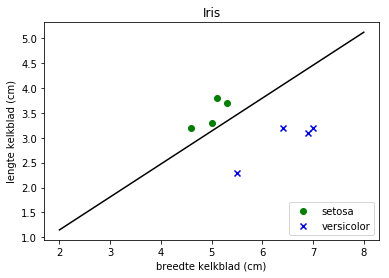

epoch = 7
teller = 0
[5.1 3.8] 1
predict = 1
teller = 1
[4.6 3.2] 1
predict = 1
teller = 2
[5.3 3.7] 1
predict = 1
teller = 3
[5.  3.3] 1
predict = 1
teller = 4
[7.  3.2] 0
predict = 0
teller = 5
[6.4 3.2] 0
predict = 0
teller = 6
[6.9 3.1] 0
predict = 0
teller = 7
[5.5 2.3] 0
predict = 0
foutenlijst = [0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0, 0]
rechte met vgl. -0.44611756413650105 * x + 0.6747182824773652 * x2 + 0.11624345363663242 = 0


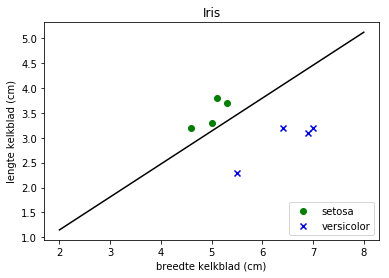

In [29]:
ppn = Perceptron22(eta=0.1, n_iter=8)
ppn.fit(X2,y2)

<div>
    <h2>Referentielijst</h2> 
</div>

[1] Dua, D., & Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. <br> &nbsp; &nbsp; &nbsp; &nbsp; Irvine, CA: University of California, School of Information and Computer Science.<br>
[2] Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. *Annals of Eugenics*. 7(2), 179–188. <br> &nbsp; &nbsp; &nbsp; &nbsp; https://doi.org/10.1111/j.1469-1809.1936.tb02137.x.<br>
[3] Kosaciec Szczecinkowaty [CC BY-SA 3.0 (https://creativecommons.org/licenses/by-sa/3.0)], via Wikimedia Commons;<br>
[4] Frank Mayfield [CC BY-SA 2.0 (https://creativecommons.org/licenses/by-sa/2.0)], via Wikimedia Commons;<br>
[5] No machine-readable author provided. Dlanglois assumed (based on copyright claims). <br> &nbsp; &nbsp; &nbsp; &nbsp;
[CC BY-SA 3.0 (http://creativecommons.org/licenses/by-sa/3.0/)], via Wikimedia Commons

<img src="../.images/cclic.png" alt="Banner" align="left" style="width:80px;"/><br><br>
Notebook KIKS, zie <a href="http://www.aiopschool.be">ai op school</a>, van F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>.